Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
import glob
pd.set_option('display.max_columns', 50)

#### Read all files, sum properties, and plot

Households

In [32]:
csv_files = glob.glob("..\Datalogs\Household*.csv")

sum_list = []

for file in csv_files:
    df = pd.read_csv(file)
    n_households = df.shape[0]
    sum_list.append(df.sum())

sum_df = pd.concat(sum_list, axis=1).T
households = sum_df.reset_index(drop=True)


Consumer Firms

In [33]:
csv_files = glob.glob("..\Datalogs\Consumer*.csv")

sum_list = []

for file in csv_files:
    df = pd.read_csv(file)
    n_cons_firms = df.shape[0]
    sum_list.append(df.sum())

sum_df = pd.concat(sum_list, axis=1).T
cons_firms = sum_df.reset_index(drop=True)


Capital Firms

In [34]:
csv_files = glob.glob("..\Datalogs\Capital*.csv")

sum_list = []

for file in csv_files:
    df = pd.read_csv(file)
    n_cap_firms = df.shape[0]
    sum_list.append(df.sum())

sum_df = pd.concat(sum_list, axis=1).T
cap_firms = sum_df.reset_index(drop=True)

Take averages

In [35]:
households_average = households.apply(lambda x: x/n_households)
cons_firms_average = cons_firms.apply(lambda x: x/n_cons_firms)
cap_firms_average = cap_firms.apply(lambda x: x/n_cap_firms)

In [36]:
t = np.linspace(0,36,37)

### Check data and fix smt up

In [37]:
households.head()

wealth_human  expenditure_consumption  expenditure_tax  \
0  2.950550e+05                      0.0              0.0   
1  2.968850e+05                 603741.0              0.0   
2  8.478452e+08                      0.0              0.0   
3  1.061738e+09                      0.0              0.0   
4  1.309705e+09                      0.0              0.0   

   consumption_propensity   new_savings  cash_on_hand_real_desired  \
0              294.064069  0.000000e+00                        0.0   
1              294.064069  1.830000e+03                        0.0   
2              294.064069  8.475503e+08                        0.0   
3              294.064069  1.061442e+09                        0.0   
4              294.064069  1.309400e+09                        0.0   

   cash_on_hand_desired  cash_on_hand_current  saving_propensity  \
0                   0.0                   0.0         118.447734   
1              173418.0                   0.0         138.447735   
2          -271875569.0                   0.0         118.447734   
3          -321213382.0                   0.0         118.447734   
4          -372194204.0                   0.0         118.447734   

   saving_propensity_optimist  saving_propensity_pessimist  income_current  \
0                  118.447734                   178.447743             0.0   
1                  118.447734                   178.447743        779559.0   
2                  118.447734                   178.447743       1208139.0   
3                  118.447734                   178.447743       1222826.0   
4                  118.447734                   178.447743       1283455.0   

   income_average  income_wage  income_unemployment_benefit  \
0    0.000000e+00          0.0                          0.0   
1    7.795590e+05     779559.0                          0.0   
2   -9.726796e+08    1208139.0                          0.0   
3   -1.146722e+09    1222826.0                          0.0   
4   -1.326550e+09    1283455.0                          0.0   

   income_gov_transfers  income_firm_owner_dividend  unemployed  \
0                   0.0                         0.0        19.0   
1                   0.0                         0.0        30.0   
2                   0.0                         0.0         0.0   
3                   0.0                         0.0         0.0   
4                   0.0                         0.0         0.0   

   reservation_wage  unemp_duration  unemp_duration_upper_bound  \
0          560385.0             0.0                      2106.0   
1          560259.0            60.0                      2106.0   
2          557186.0             0.0                      2106.0   
3          557186.0             0.0                      2106.0   
4          557186.0             0.0                      2106.0   

   positive_sentiment  business_owner         c_f         c_h  c_excess_money  \
0               600.0             0.0  296.895452  118.447734      178.447743   
1               400.0             0.0  296.895452  118.447734      178.447743   
2               600.0             0.0  296.895452  118.447734      178.447743   
3               600.0             0.0  296.895452  118.447734      178.447743   
4               600.0             0.0  296.895452  118.447734      178.447743   

   p_majority_op_adoption  
0              177.220252  
1              177.220252  
2              177.220252  
3              177.220252  
4              177.220252

In [38]:
cons_firms.head()

production_current  production_planned  production_past  quantity_sold  \
0            593800.0                 0.0              0.0       237488.0   
1            422778.0            447491.0              0.0       237488.0   
2            817100.0           1729733.0              0.0       793491.0   
3            842500.0           1815909.0              0.0       817100.0   
4            870100.0           1883613.0              0.0       842500.0   

   total_income  revenue_sales  new_loan_issuance  subsidies  \
0           0.0            0.0                0.0        0.0   
1           0.0      2483382.0                0.0        0.0   
2           0.0     51618826.0                0.0        0.0   
3           0.0     66421048.0                0.0        0.0   
4           0.0     84754881.0                0.0        0.0   

   good_price_current  good_price_past  total_liabilities  labor_wage_bill  \
0           994.43789        950.00000                0.0         639251.0   
1          1110.08458        994.43789                0.0        1355974.0   
2          8107.74370       6487.02010                0.0        9593739.0   
3         10041.24090       8107.74370                0.0       10793515.0   
4         12324.11750      10041.24090                0.0       11994687.0   

   capital_costs  tax_payments  debt_principal_payments  \
0            0.0           0.0                      0.0   
1            0.0           0.0                      0.0   
2            0.0           0.0                      0.0   
3            0.0           0.0                      0.0   
4            0.0           0.0                      0.0   

   debt_interest_payments  dividend_payments  total_assets  leverage_ratio  \
0                     0.0                0.0      992996.0             0.0   
1                     0.0                0.0      992996.0             0.0   
2                     0.0           714661.0      992996.0             0.0   
3                     0.0           926443.0      992996.0             0.0   
4                     0.0          1202710.0      992996.0             0.0   

   cash_on_hand  dividend_ratio  dividend_ratio_optimist  \
0      992996.0        4.944379                 4.944379   
1     4792228.0        4.944379                 4.858321   
2    13448516.0        4.944379                 4.911294   
3    14257198.0        4.944379                 4.948417   
4    15207044.0        4.944379                 4.983283   

   dividend_ratio_pessimist  employee_count  wage_offer  \
0                  3.287639           412.0     99115.0   
1                  3.266472           891.0    109652.0   
2                  3.773241          5813.0    169664.0   
3                  3.928811          6403.0    181931.0   
4                  3.914171          6965.0    191463.0   

   employee_count_desired  n_active_job_postings  need_worker  w_target  \
0                  4938.0                 4938.0        100.0       0.0   
1                  4187.0                 3823.0         97.0       0.0   
2                  8171.0                 2952.0         94.0       0.0   
3                  8425.0                 2612.0         93.0       0.0   
4                  8701.0                 2298.0         94.0       0.0   

   w_current  inventory  working_capital_inventory  desired_inventory_factor  \
0        0.0   950106.0                     5938.0                149.304675   
1      100.0  1128213.0                     6220.0                151.884425   
2      100.0   817100.0                     8425.0                146.511264   
3      100.0   842500.0                     8701.0                147.145099   
4      100.0   870100.0                     8955.0                145.079410   

   inventory_factor  sentiment  bankrupt  is_cons_firm  average_profit  \
0           0.00000      100.0       0.0         100.0             0.0   
1         503.48666      100.0       0.0         100.0       24833

In [39]:
cap_firms.head()

production_current  production_planned  production_past  quantity_sold  \
0             29780.0                 0.0              0.0        11332.0   
1             21912.0             23379.0              0.0        11332.0   
2          -4141896.0          -4133263.0              0.0     -1414547.0   
3         -14316131.0         -14306679.0              0.0     -4141850.0   
4         -57107756.0         -57097200.0              0.0    -14316024.0   

   total_income  revenue_sales  new_loan_issuance  subsidies  \
0           0.0            0.0                0.0        0.0   
1           0.0       118162.0                0.0        0.0   
2           0.0    -15764546.0                0.0        0.0   
3           0.0    -35819097.0                0.0        0.0   
4           0.0   -158158087.0                0.0        0.0   

   good_price_current  good_price_past  total_liabilities  labor_wage_bill  \
0           500.78248        475.00000                0.0         249399.0   
1           540.14335        500.78248                0.0         281718.0   
2           528.90802        528.23404                0.0         496709.0   
3           509.44894        528.90802                0.0         519759.0   
4           523.88976        509.44894                0.0         602042.0   

   capital_costs  tax_payments  debt_principal_payments  \
0            0.0           0.0                      0.0   
1            0.0           0.0                      0.0   
2            0.0           0.0                      0.0   
3            0.0           0.0                      0.0   
4            0.0           0.0                      0.0   

   debt_interest_payments  dividend_payments  total_assets  leverage_ratio  \
0                     0.0                0.0      500951.0             0.0   
1                     0.0                0.0      500951.0             0.0   
2                     0.0             5799.0      500951.0             0.0   
3                     0.0             6284.0      500951.0             0.0   
4                     0.0             6781.0      500951.0             0.0   

   cash_on_hand  dividend_ratio  dividend_ratio_optimist  \
0      500951.0        2.507824                 2.507824   
1      500951.0        2.507824                 2.525083   
2      889374.0        2.507824                 2.611377   
3      926855.0        2.507824                 2.591570   
4      981995.0        2.507824                 2.637450   

   dividend_ratio_pessimist  employee_count  wage_offer  \
0                  1.757260           169.0     50092.0   
1                  1.793472            40.0     54623.0   
2                  1.552126           125.0     58481.0   
3                  1.582263           133.0     61772.0   
4                  1.591039           170.0     63854.0   

   employee_count_desired  n_active_job_postings  need_worker  w_target  \
0                  2478.0                 2478.0         50.0       0.0   
1                   206.0                  190.0         45.0       0.0   
2                   211.0                   92.0         14.0       0.0   
3                   223.0                  100.0         15.0       0.0   
4                   238.0                  106.0         14.0       0.0   

   w_current   inventory  working_capital_inventory  desired_inventory_factor  \
0        0.0     45406.0                     2978.0                 75.097758   
1       50.0     55622.0                     3090.0                 75.880081   
2       50.0  -4112220.0                     4187.0                 77.636311   
3       50.0 -14286773.0                     4321.0                 78.338342   
4       50.0 -57078896.0                     4434.0                 79.537023   

   inventory_factor  sentiment  bankrupt  is_cons_firm  average_profit  \
0          0.000000       50.0       0.0           0.0             0.0   
1        260.482580       50.0       0.0           0.0      

#### Plot some household stuff

In [40]:
cols = households.columns
cols

Index(['wealth_human', 'expenditure_consumption', 'expenditure_tax',
       'consumption_propensity', 'new_savings', 'cash_on_hand_real_desired',
       'cash_on_hand_desired', 'cash_on_hand_current', 'saving_propensity',
       'saving_propensity_optimist', 'saving_propensity_pessimist',
       'income_current', 'income_average', 'income_wage',
       'income_unemployment_benefit', 'income_gov_transfers',
       'income_firm_owner_dividend', 'unemployed', 'reservation_wage',
       'unemp_duration', 'unemp_duration_upper_bound', 'positive_sentiment',
       'business_owner', 'c_f', 'c_h', 'c_excess_money',
       'p_majority_op_adoption'],
      dtype='object')

In [41]:
cols = ['wealth_human', 'expenditure_consumption', 'expenditure_tax',
       'consumption_propensity', 'new_savings', 'cash_on_hand_real_desired',
       'cash_on_hand_desired', 'cash_on_hand_current',
       'income_current', 'income_average', 'income_wage']

In [42]:
average_cols = households_average.columns
average_cols

Index(['wealth_human', 'expenditure_consumption', 'expenditure_tax',
       'consumption_propensity', 'new_savings', 'cash_on_hand_real_desired',
       'cash_on_hand_desired', 'cash_on_hand_current', 'saving_propensity',
       'saving_propensity_optimist', 'saving_propensity_pessimist',
       'income_current', 'income_average', 'income_wage',
       'income_unemployment_benefit', 'income_gov_transfers',
       'income_firm_owner_dividend', 'unemployed', 'reservation_wage',
       'unemp_duration', 'unemp_duration_upper_bound', 'positive_sentiment',
       'business_owner', 'c_f', 'c_h', 'c_excess_money',
       'p_majority_op_adoption'],
      dtype='object')

In [43]:
average_cols =  [ 'wealth_human', 'expenditure_consumption', 'expenditure_tax',
       'consumption_propensity', 'new_savings', 'cash_on_hand_real_desired',
       'cash_on_hand_desired', 'cash_on_hand_current', 'saving_propensity',
       'saving_propensity_optimist', 'saving_propensity_pessimist',
       'income_current', 'income_average', 'income_wage', 'unemployed', 'reservation_wage',
       'unemp_duration', 'unemp_duration_upper_bound', 'positive_sentiment']

In [44]:
n_households

600

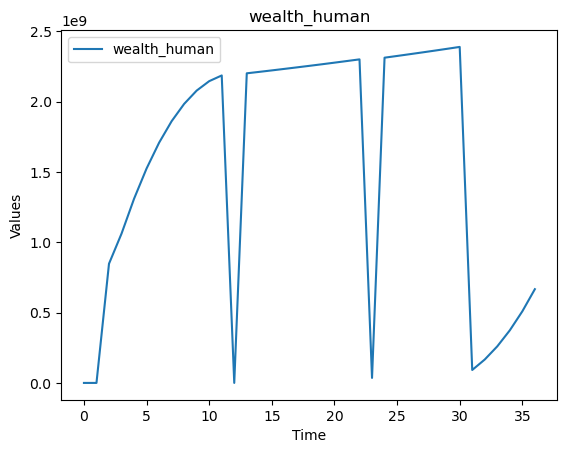

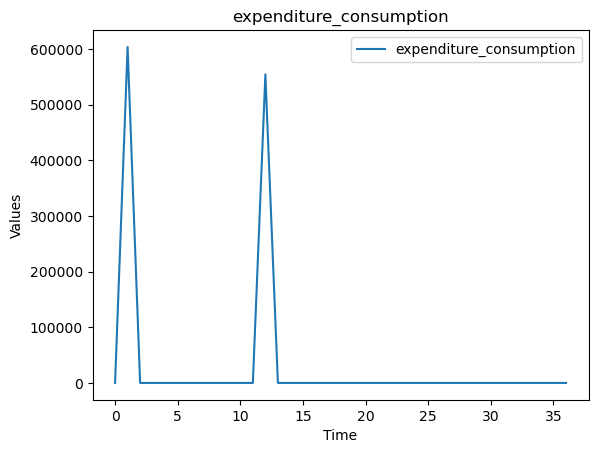

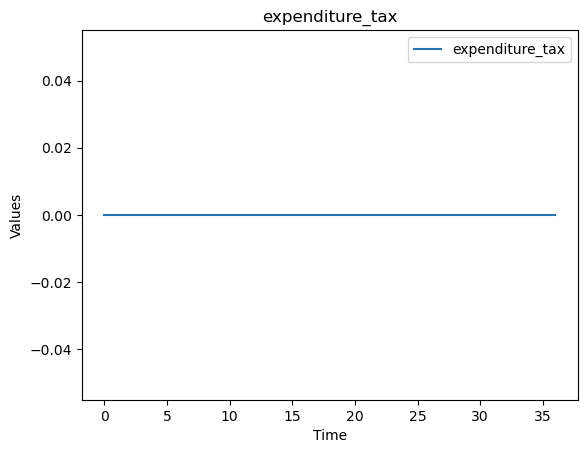

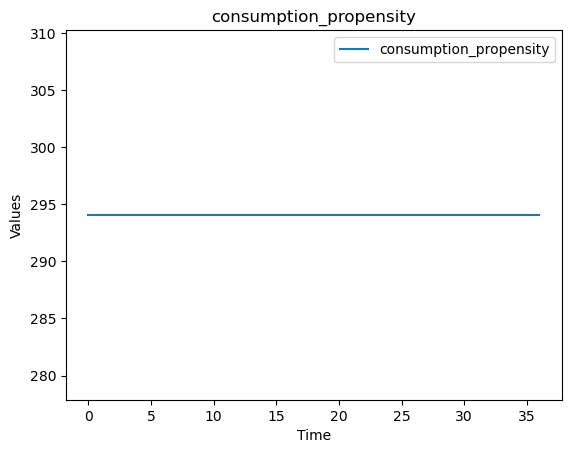

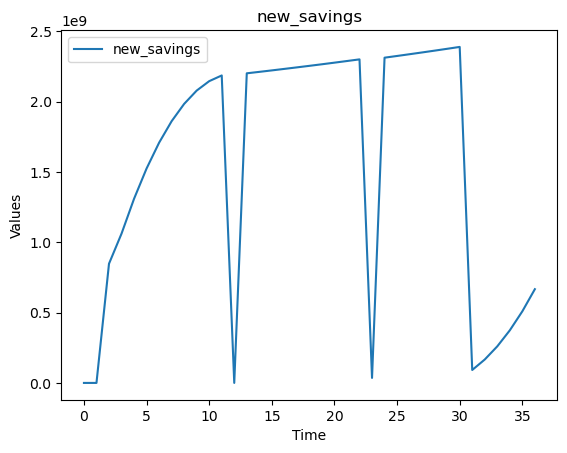

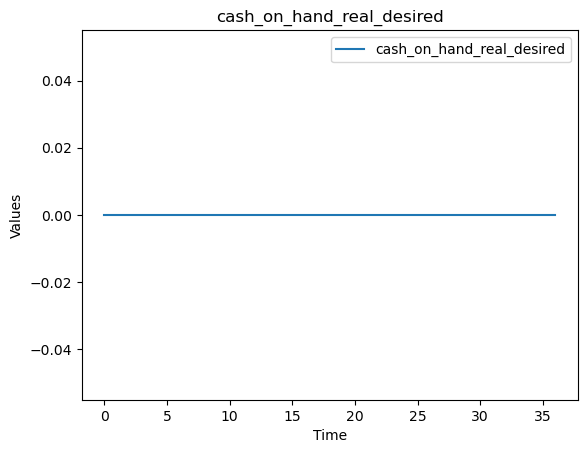

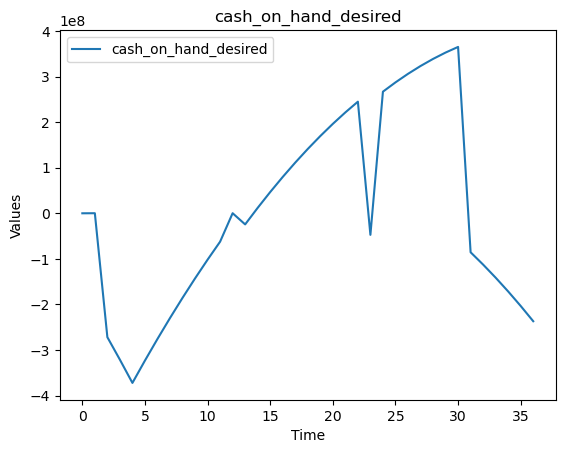

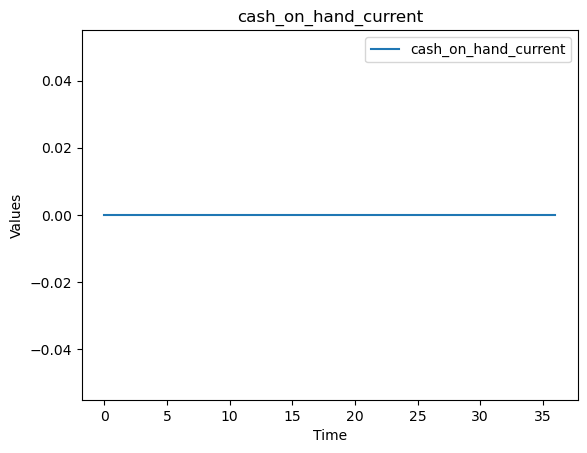

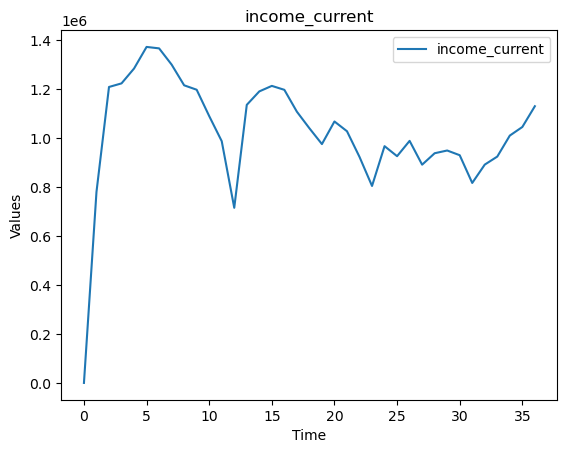

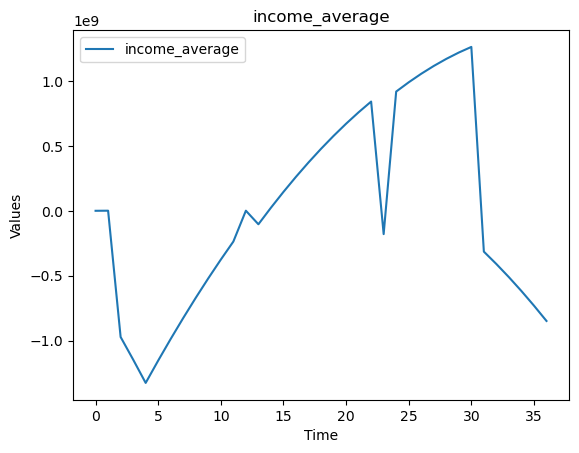

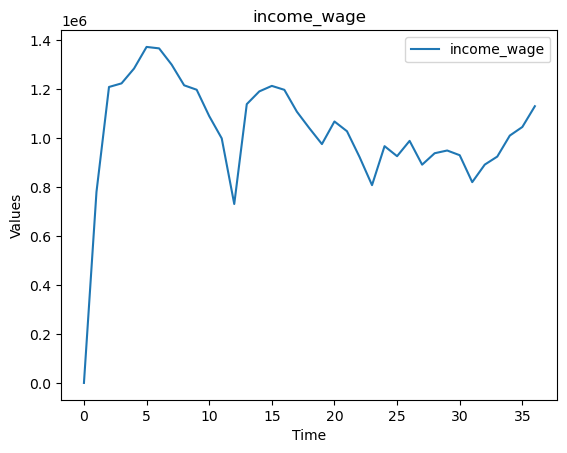

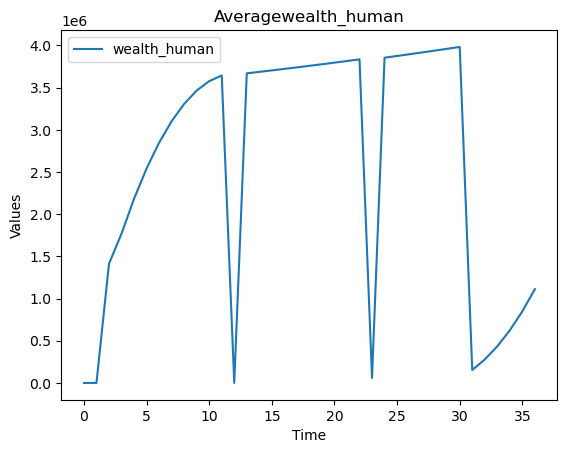

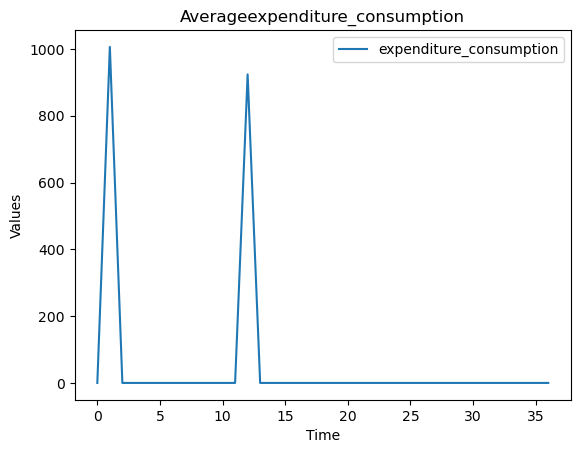

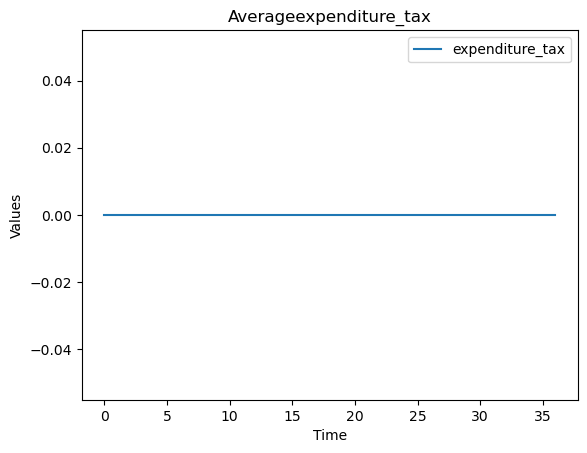

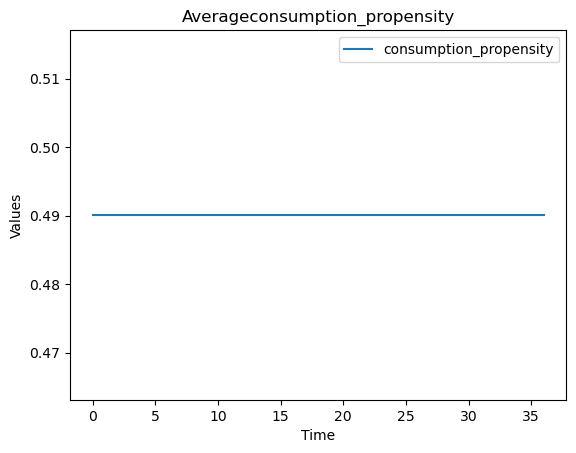

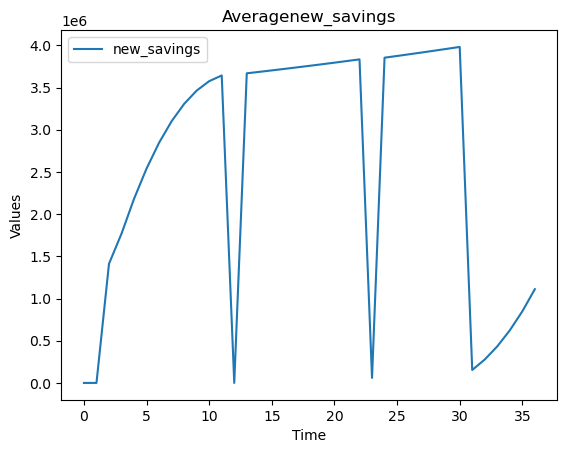

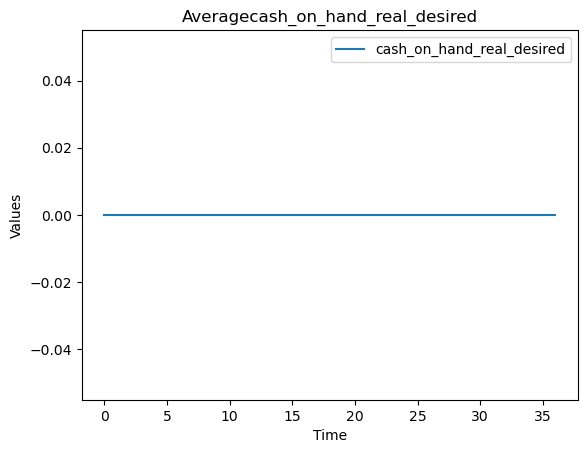

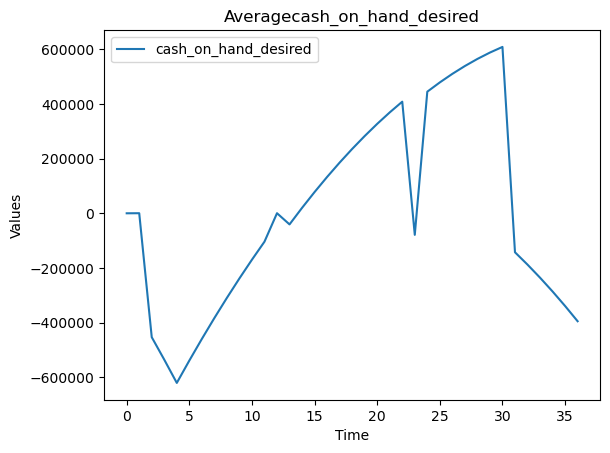

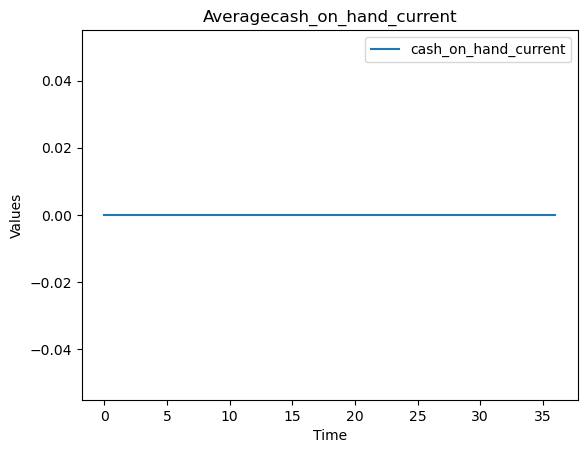

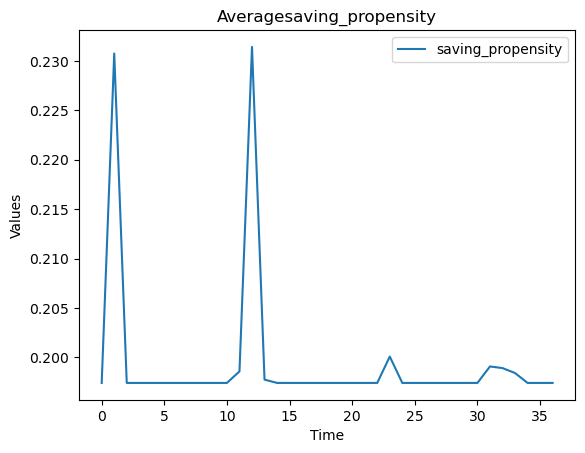

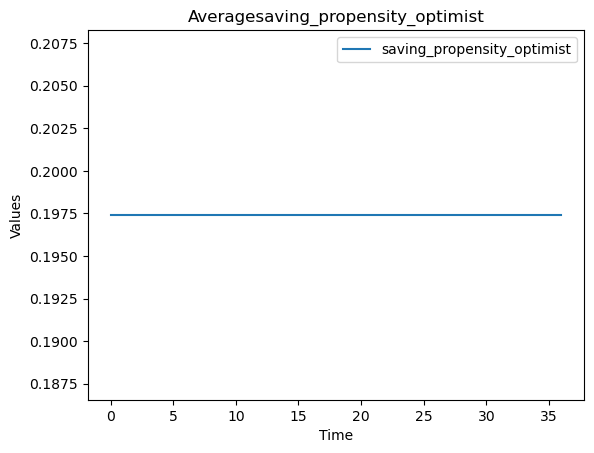

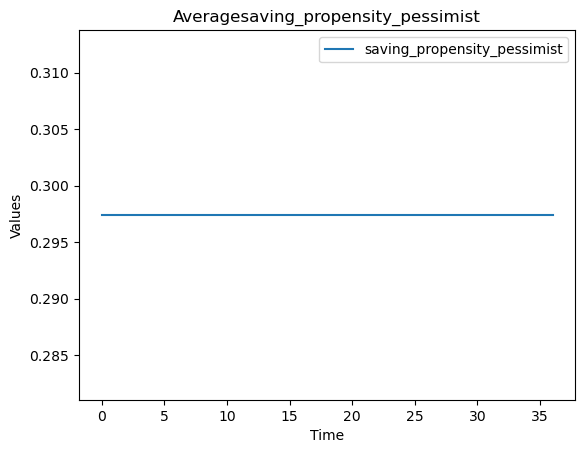

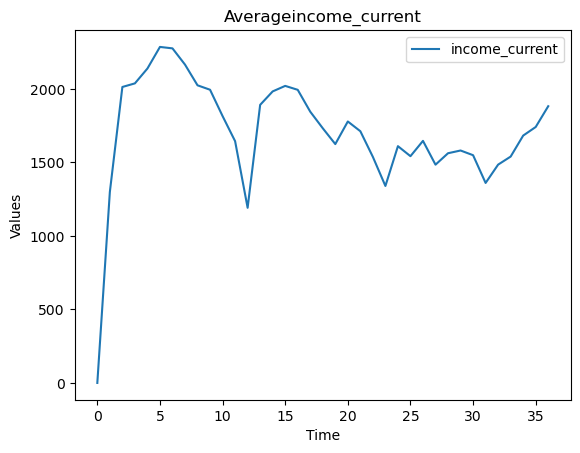

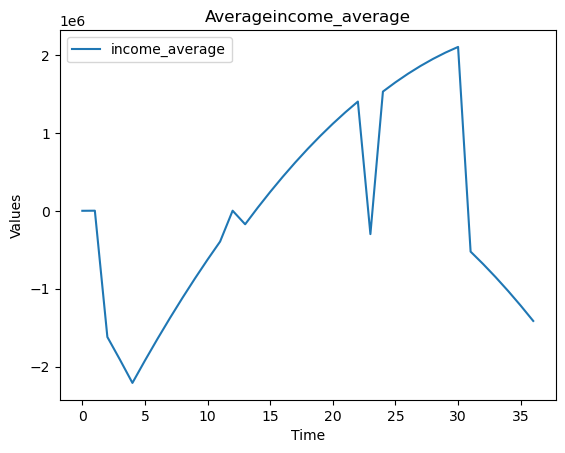

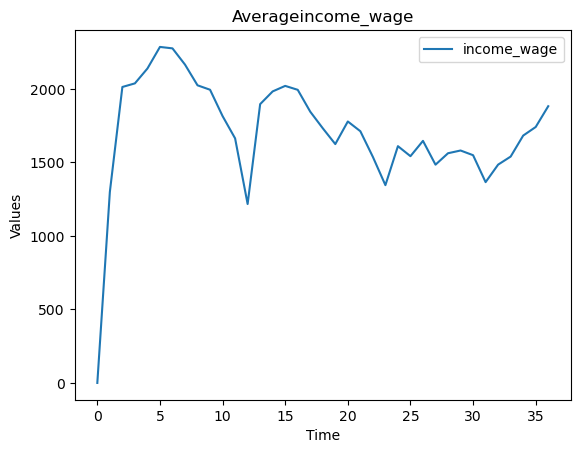

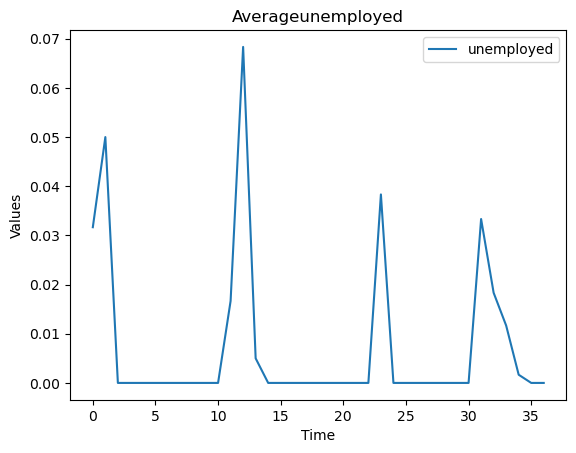

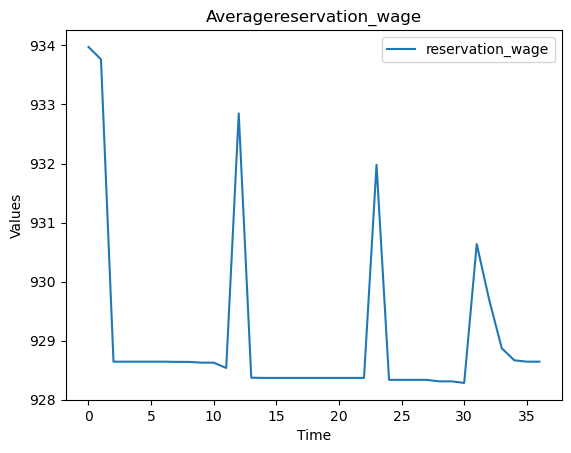

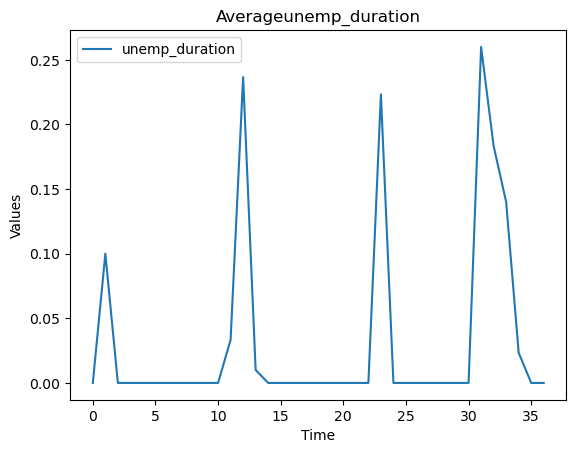

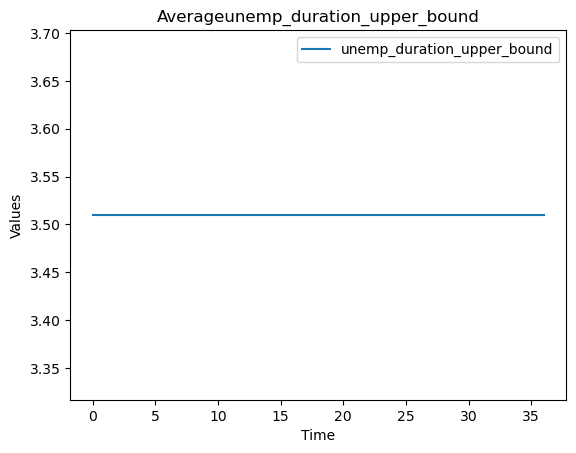

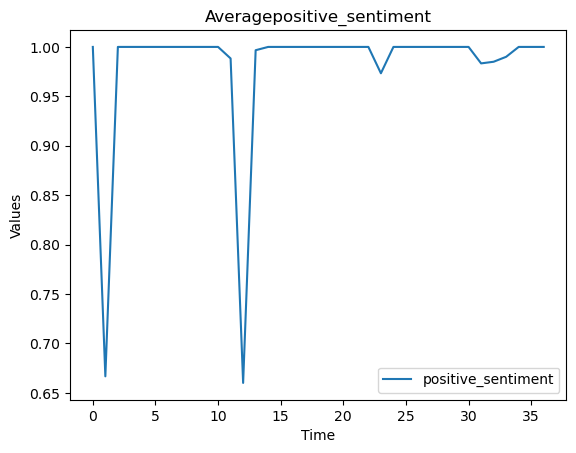

In [45]:
for column in cols:
    plt.plot(t, households[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(column)
    plt.legend()
    plt.show()
    
#averages
for column in average_cols:
    plt.plot(t, households_average[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f"Average{column}")
    plt.legend()
    plt.show()

#### Plot some cons and cap firm stuff

In [118]:
cols = cons_firms.columns
average_cols = cons_firms.columns
cols

Index(['production_current', 'production_planned', 'production_past',
       'quantity_sold', 'total_income', 'revenue_sales', 'new_loan_issuance',
       'subsidies', 'good_price_current', 'good_price_past',
       'total_liabilities', 'labor_wage_bill', 'capital_costs', 'tax_payments',
       'debt_principal_payments', 'debt_interest_payments',
       'dividend_payments', 'total_assets', 'leverage_ratio', 'cash_on_hand',
       'dividend_ratio', 'dividend_ratio_optimist', 'dividend_ratio_pessimist',
       'employee_count', 'wage_offer', 'employee_count_desired',
       'n_active_job_postings', 'need_worker', 'w_target', 'w_current',
       'inventory', 'working_capital_inventory', 'desired_inventory_factor',
       'inventory_factor', 'sentiment', 'bankrupt', 'is_cons_firm',
       'average_profit', 'average_sale_quantity', 'short_term_funding_gap',
       'long_term_funding_gap', 'expected_wage_bill', 'layoff_wage_savings',
       'expected_wage_bill_shortfall', 'expected_long_term

In [119]:
cols = ['production_current', 'production_planned', 'production_past',
       'quantity_sold', 'total_income', 'revenue_sales', 'new_loan_issuance',
       'subsidies',
       'total_liabilities', 'labor_wage_bill', 'capital_costs', 'tax_payments',
       'debt_principal_payments', 'debt_interest_payments',
       'dividend_payments', 'total_assets', 'leverage_ratio', 'cash_on_hand',
       'dividend_ratio', 'dividend_ratio_optimist', 'dividend_ratio_pessimist',
       'employee_count', 'wage_offer', 'employee_count_desired',
       'n_active_job_postings', 'need_worker', 'w_target', 'w_current',
       'inventory', 'working_capital_inventory', 'desired_inventory_factor',
       'inventory_factor', 'sentiment', 'bankrupt', 'is_cons_firm',
       'average_profit', 'average_sale_quantity', 'short_term_funding_gap',
       'long_term_funding_gap', 'expected_wage_bill', 'layoff_wage_savings',
       'expected_wage_bill_shortfall', 'expected_long_term_shortfall',
       'labor_utilization', 'desired_inventory', 'inventory_reaction_factor',
       'machine_utilization', 'desired_machines']

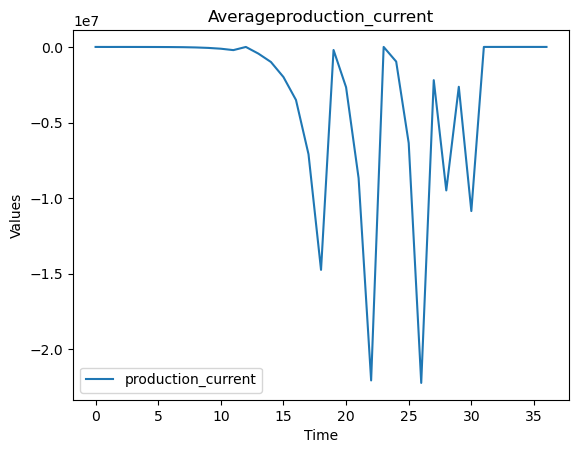

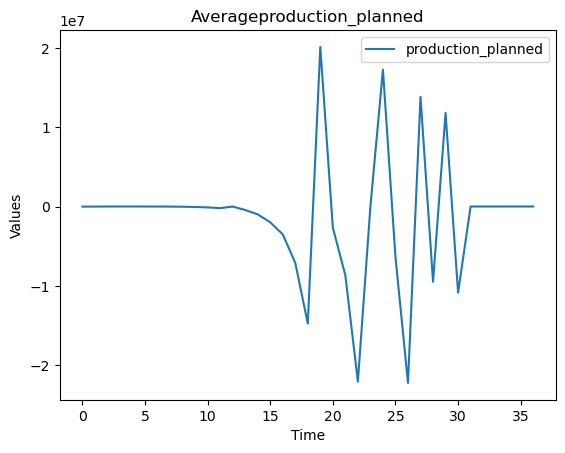

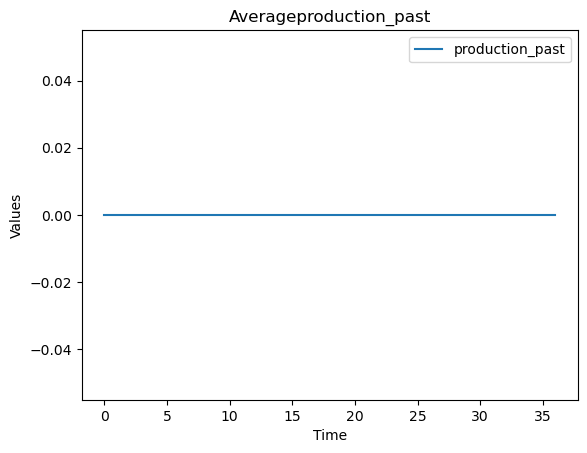

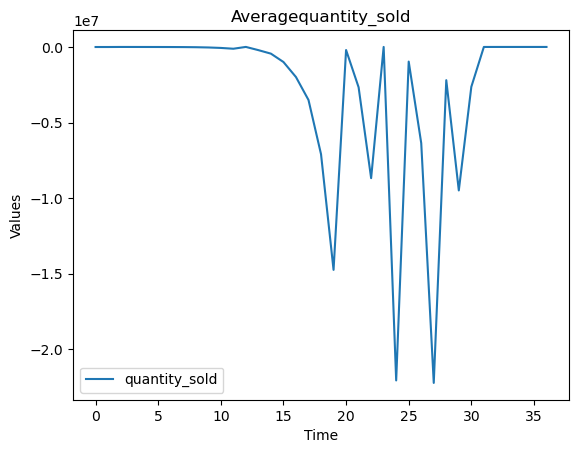

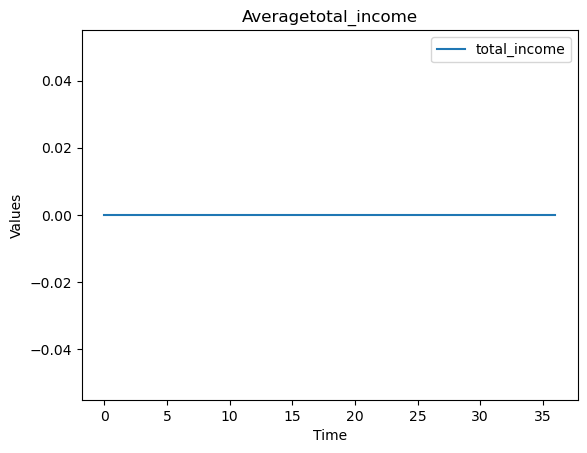

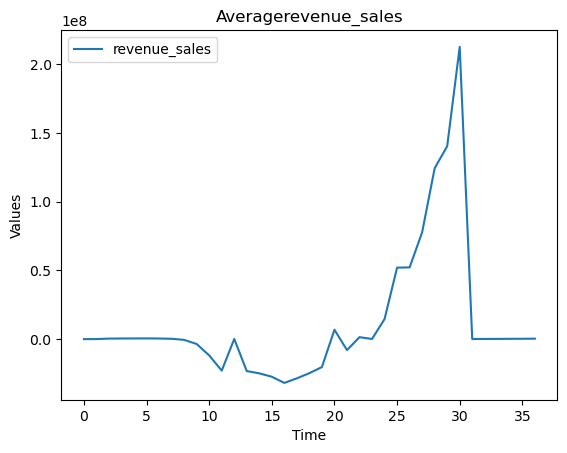

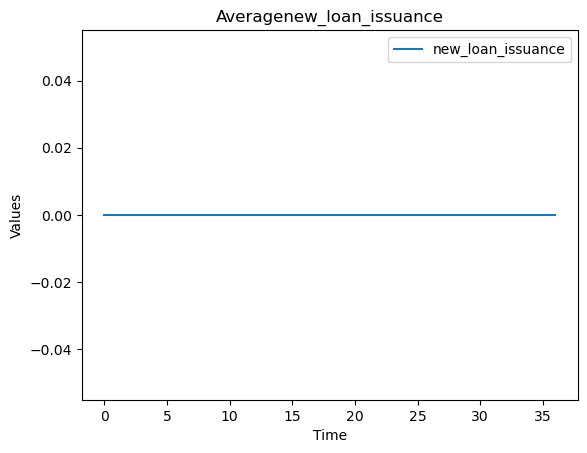

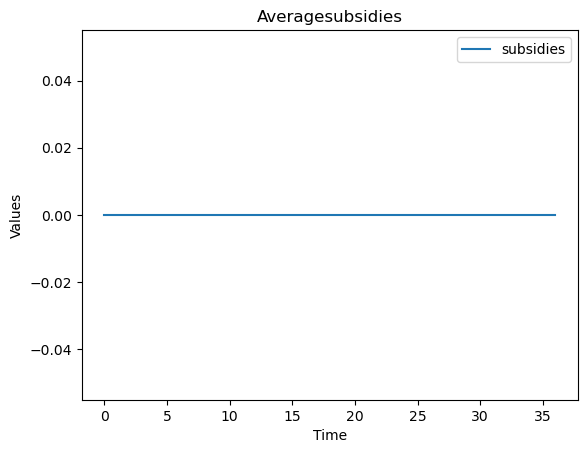

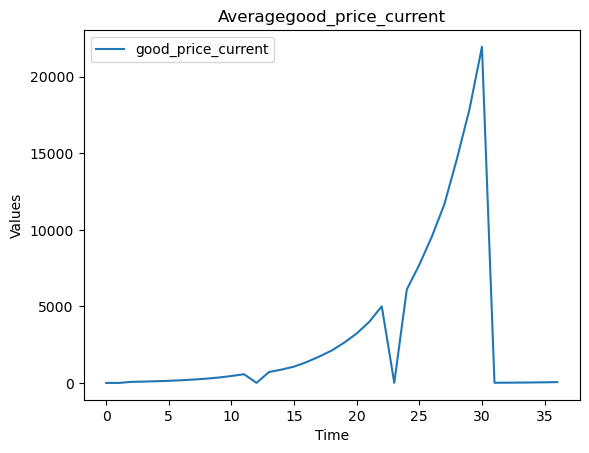

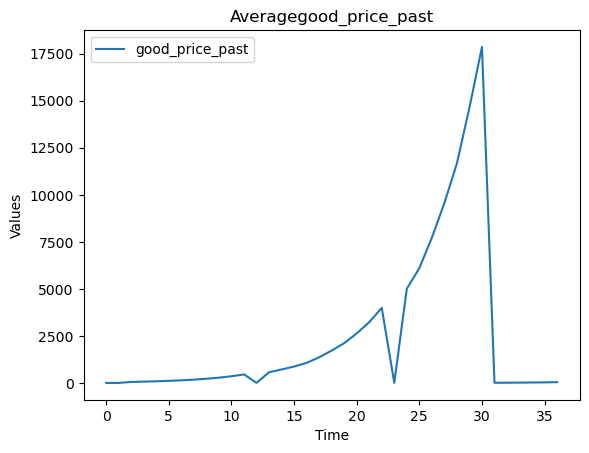

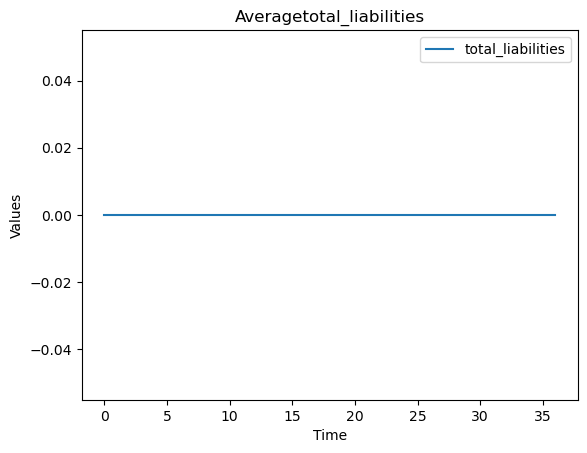

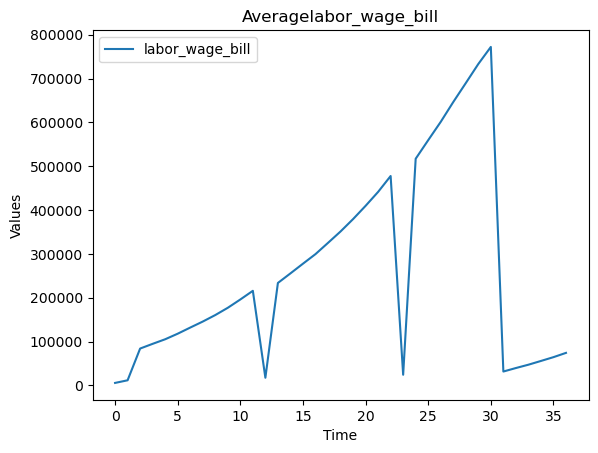

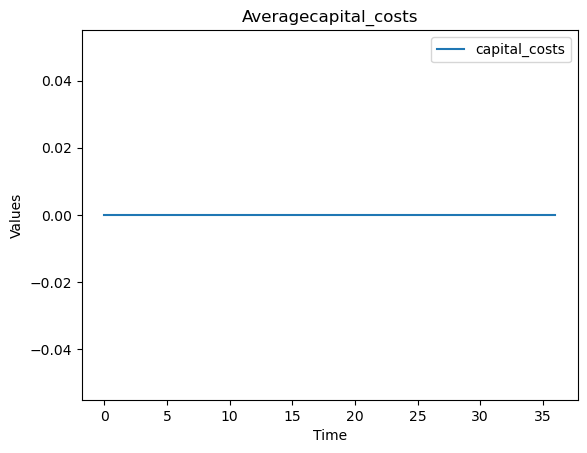

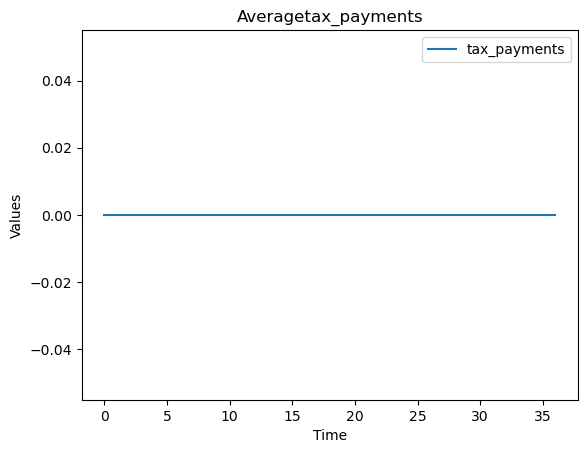

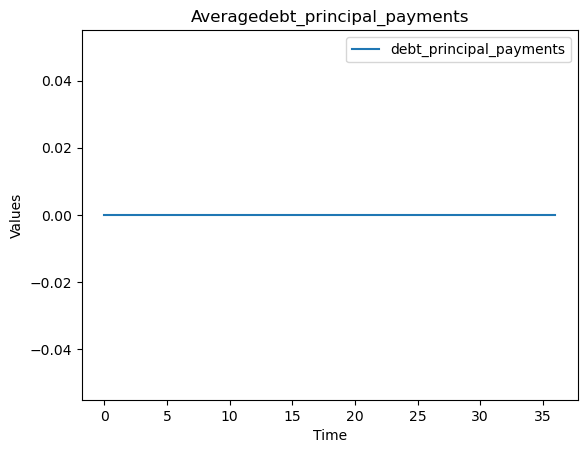

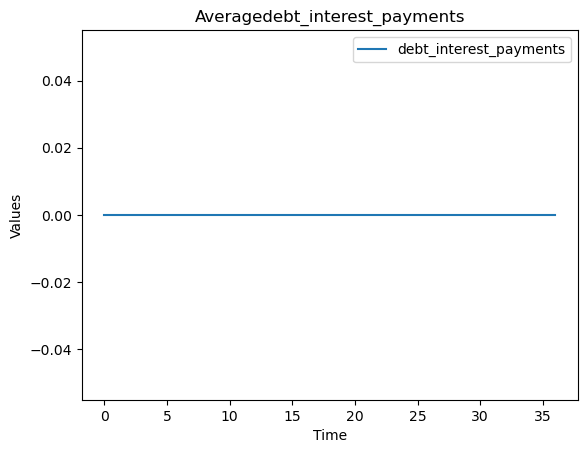

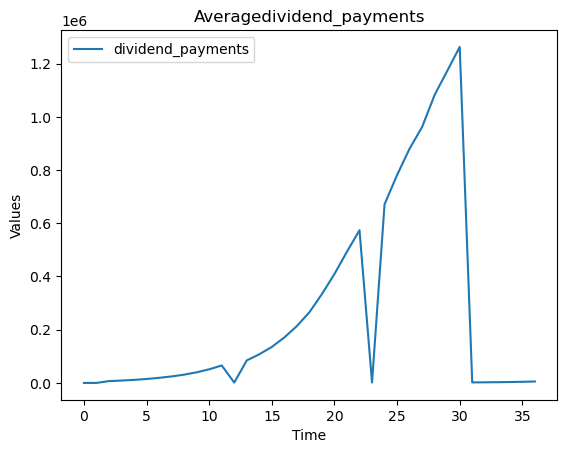

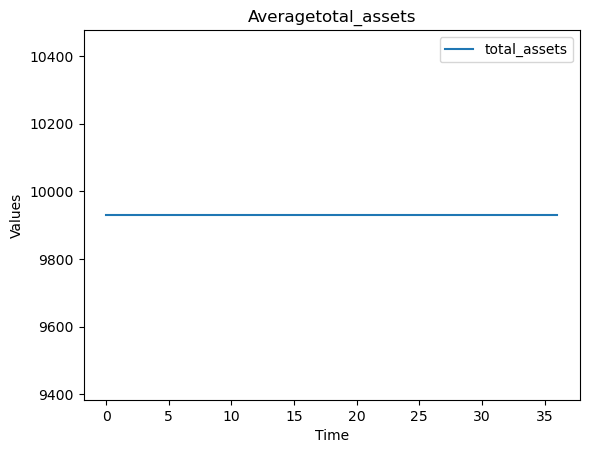

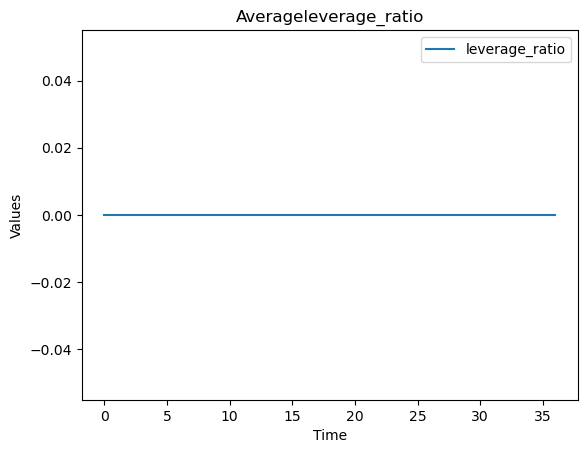

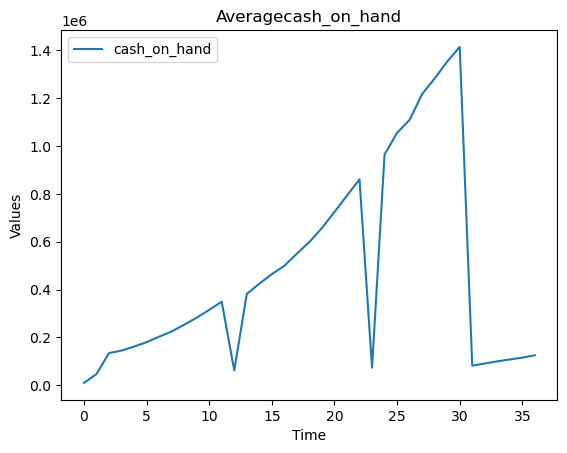

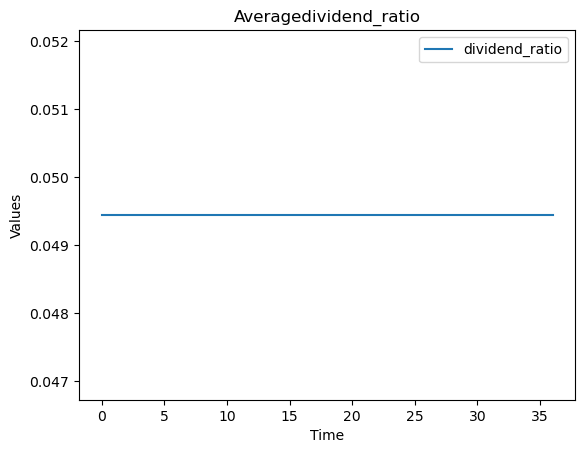

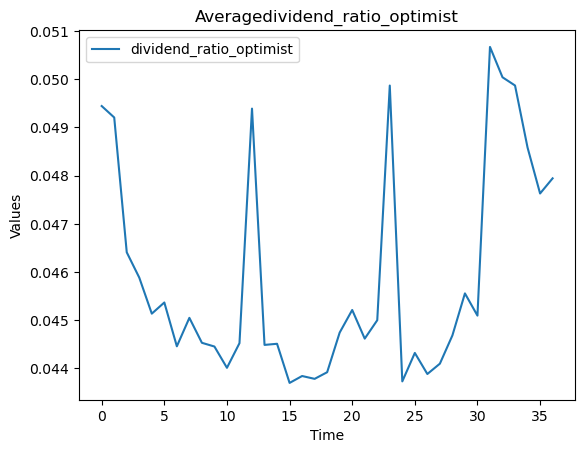

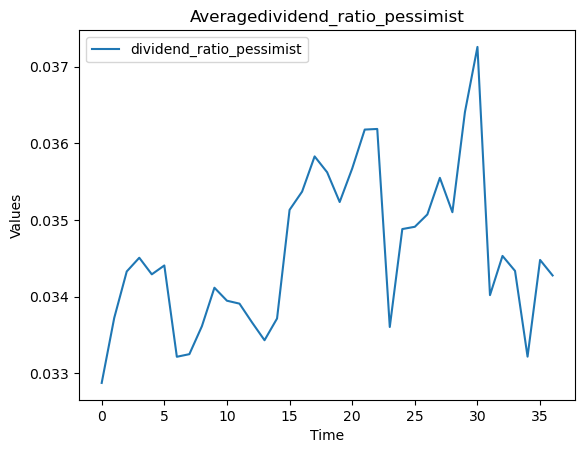

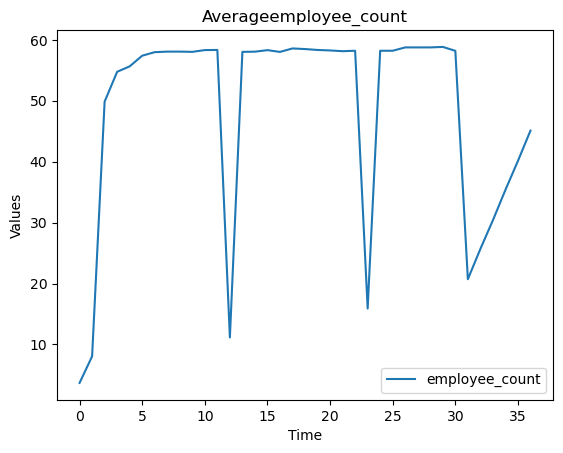

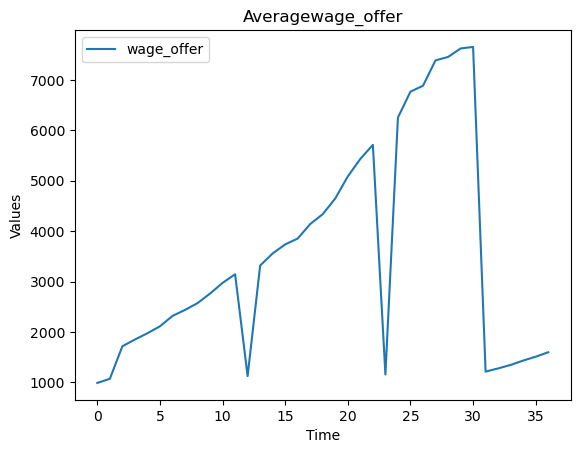

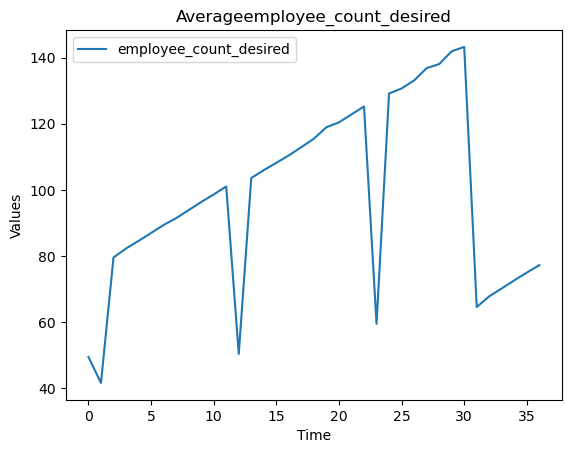

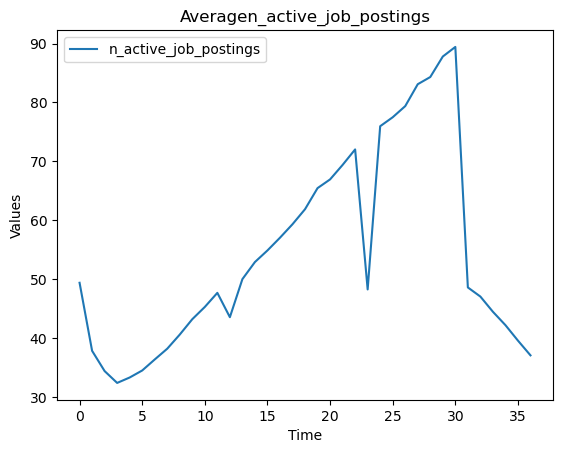

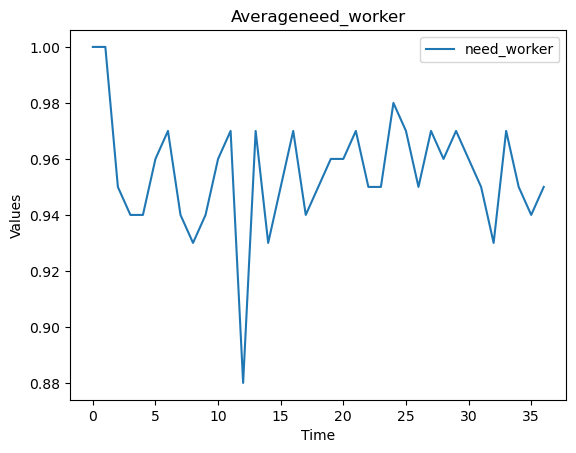

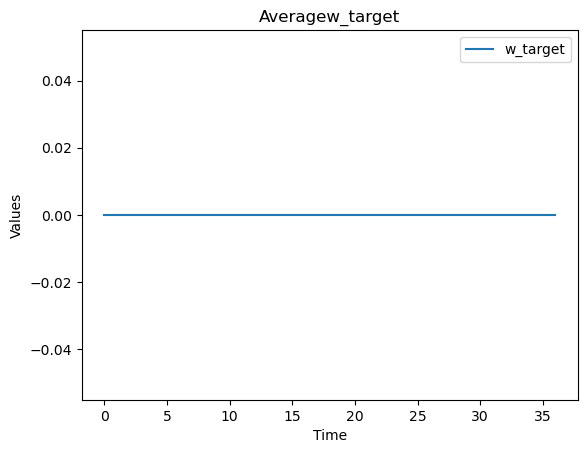

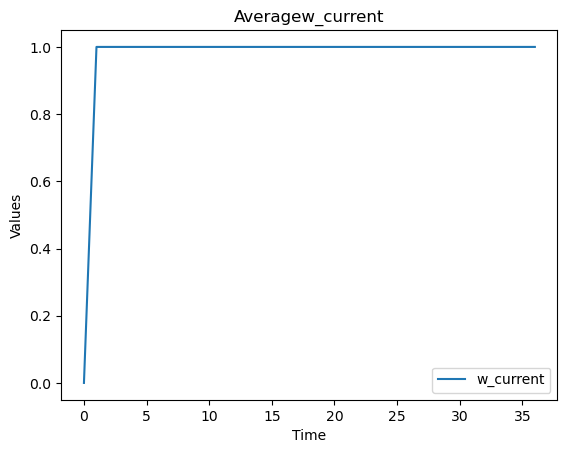

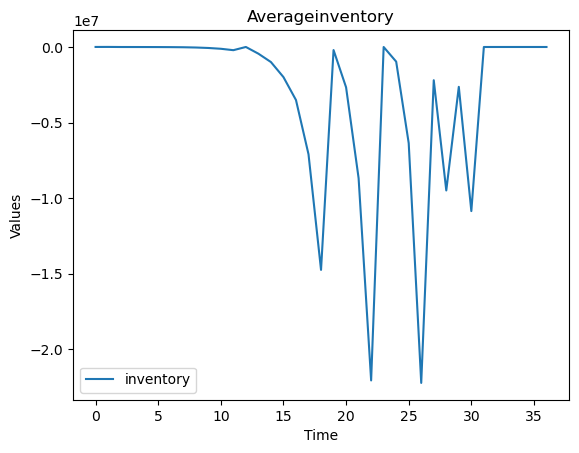

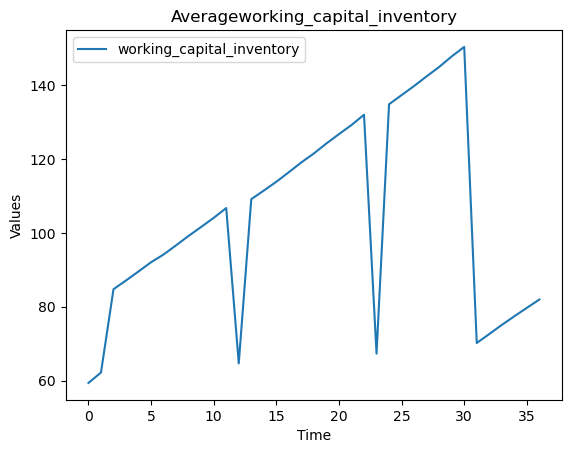

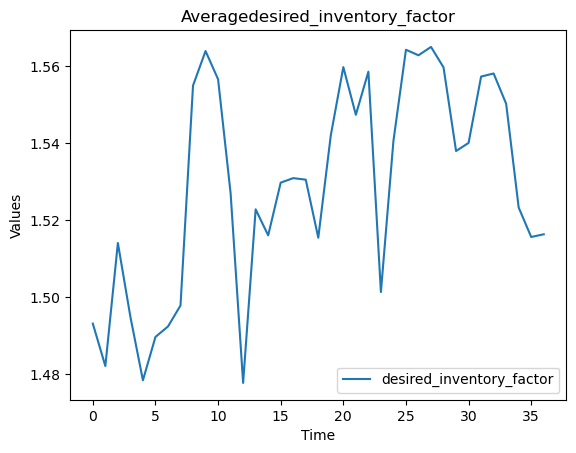

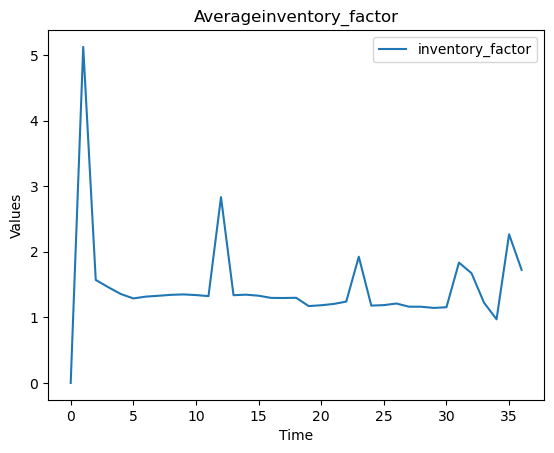

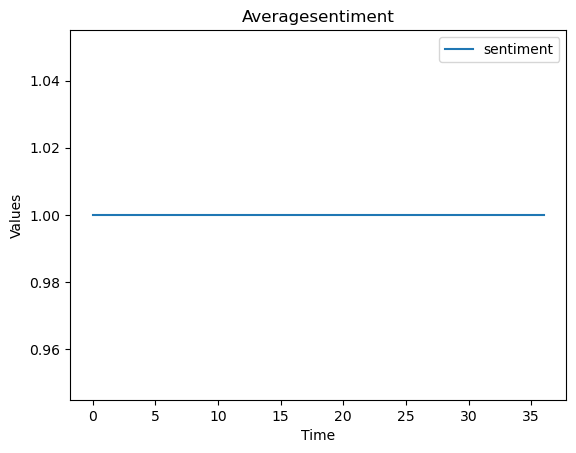

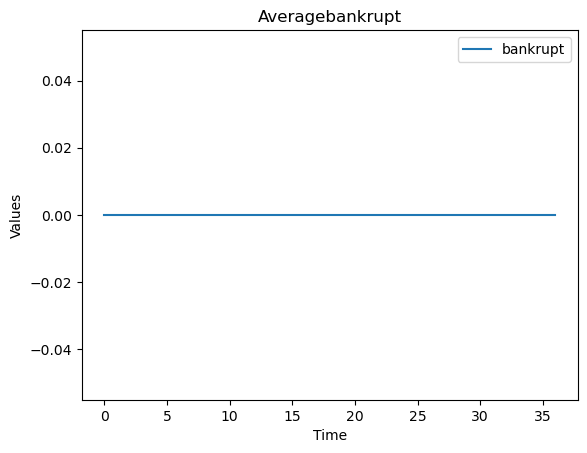

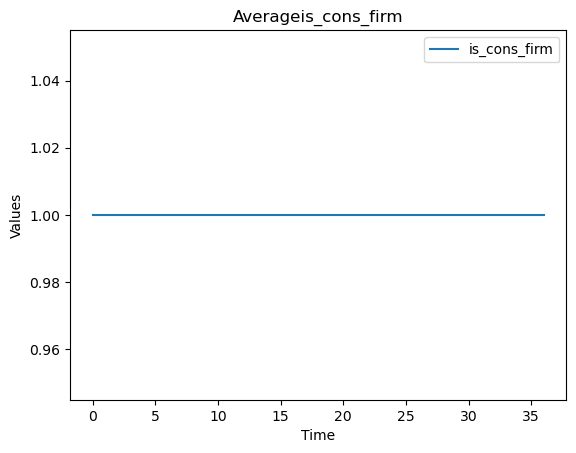

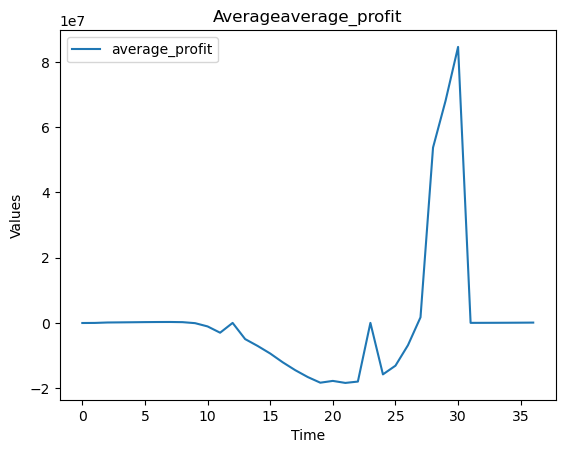

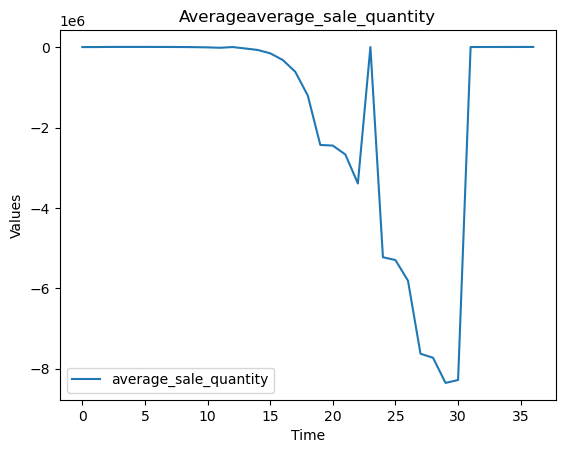

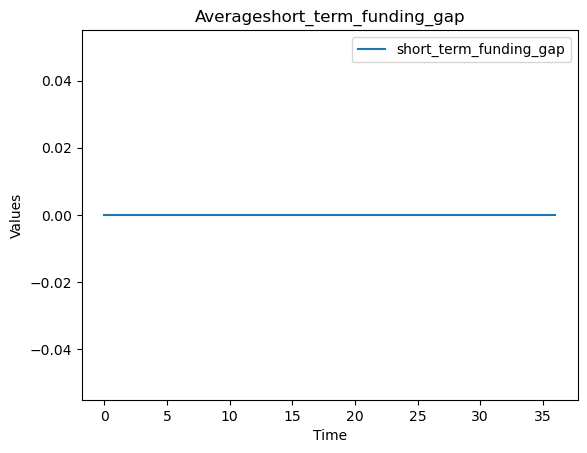

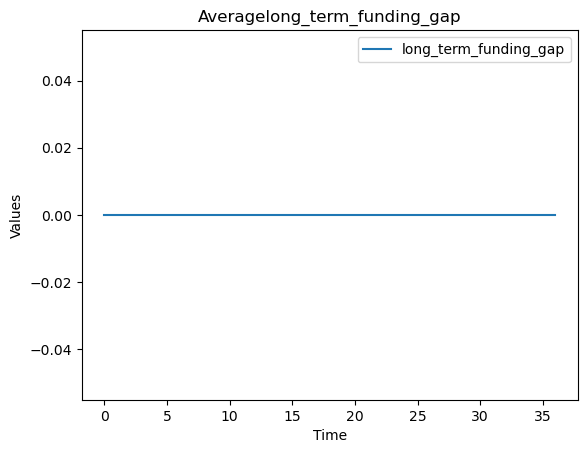

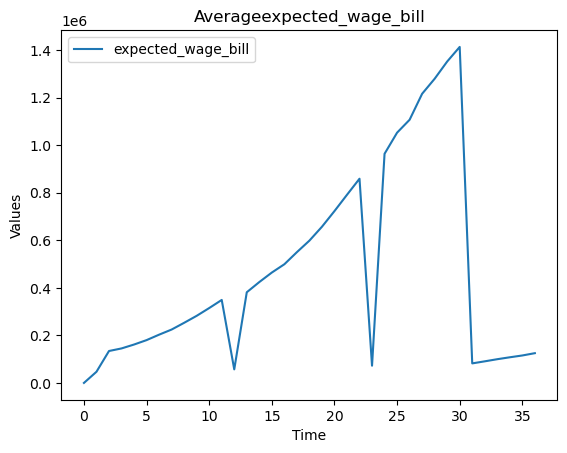

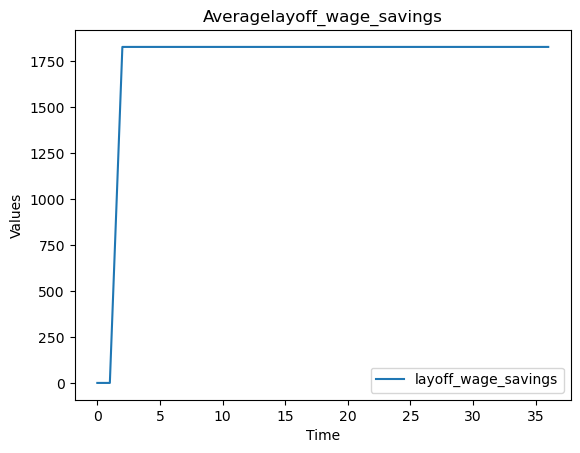

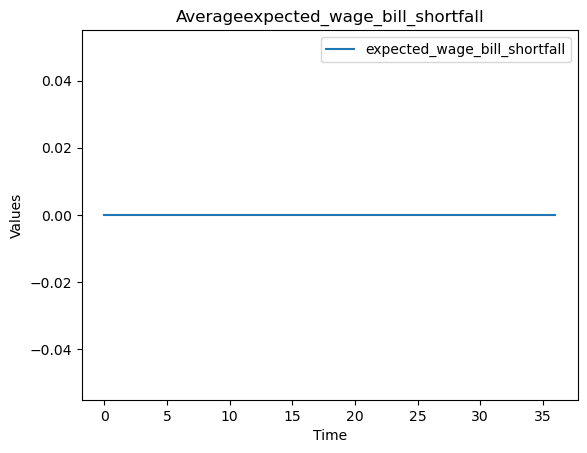

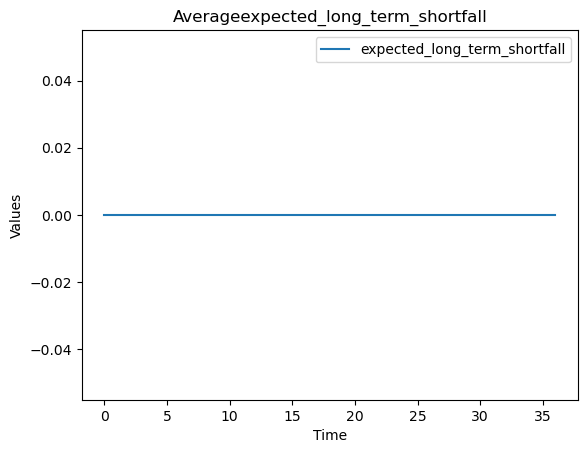

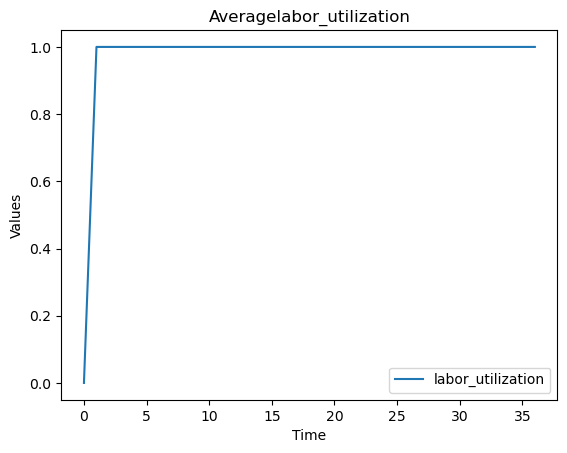

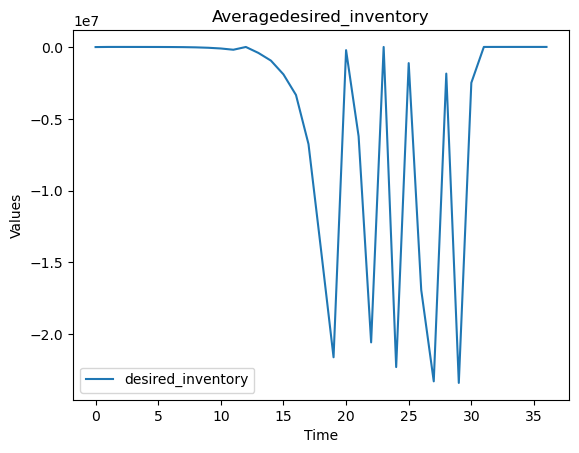

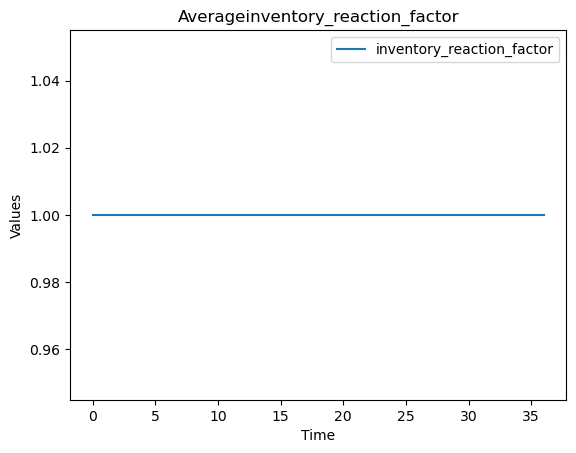

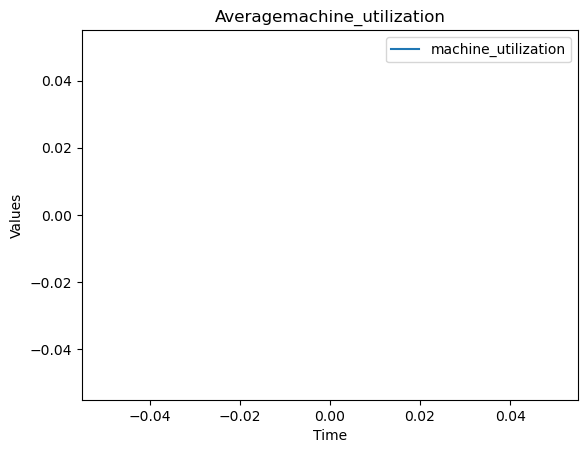

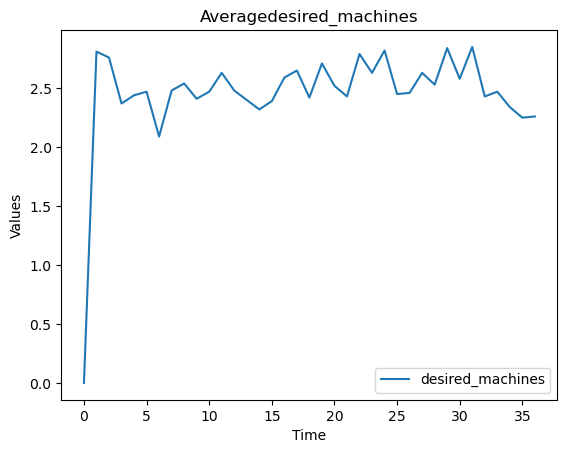

In [120]:
# averages for Consumer firm
for column in average_cols:
    plt.plot(t, cons_firms_average[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f"Average{column}")
    plt.legend()
    plt.show()

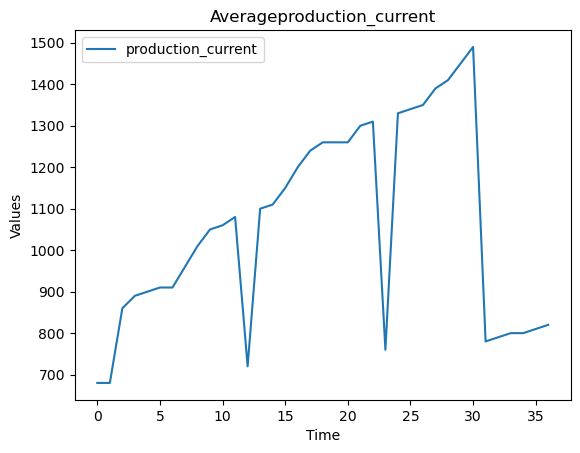

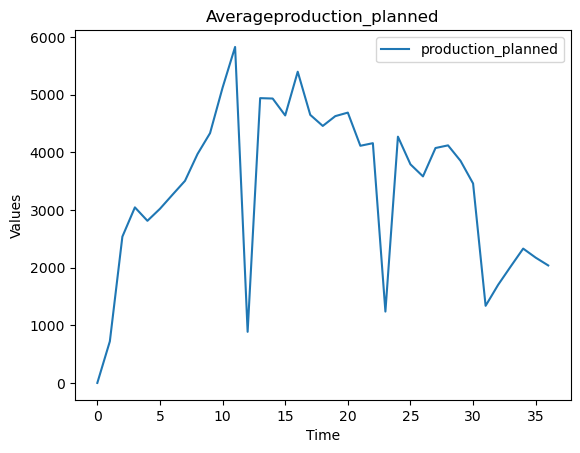

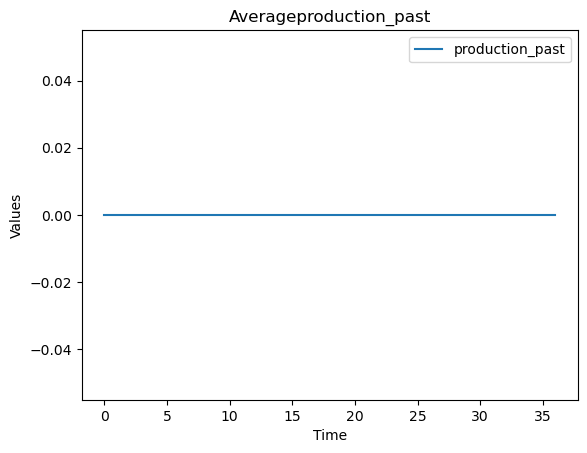

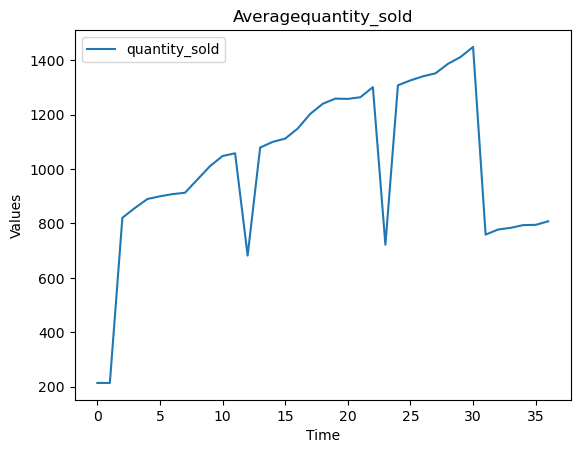

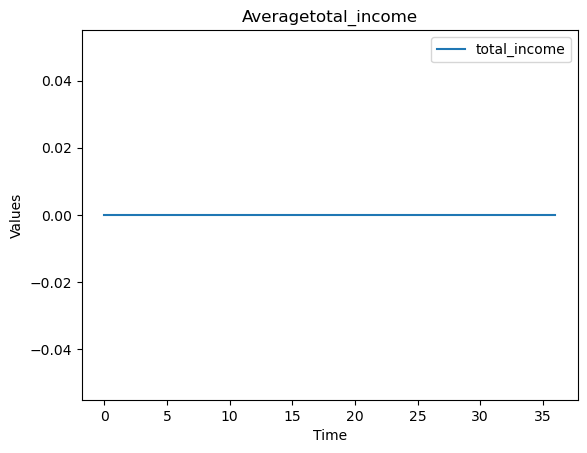

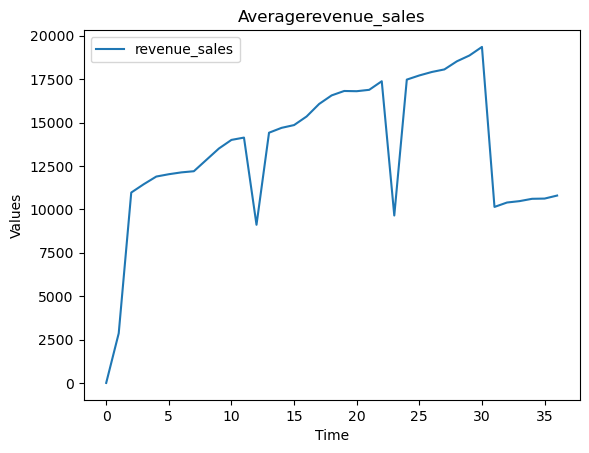

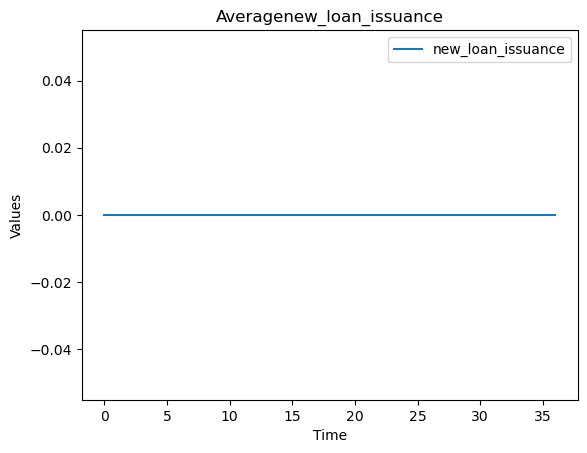

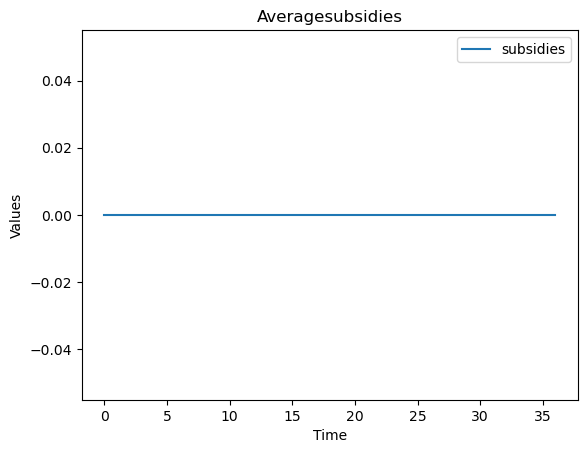

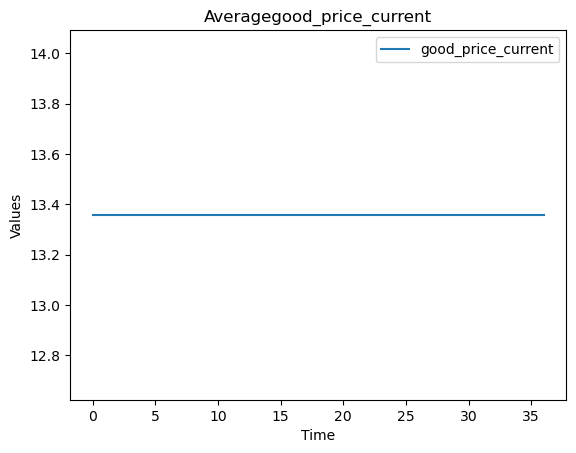

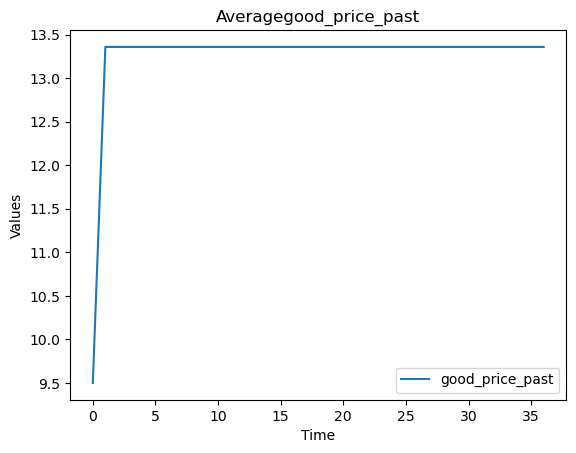

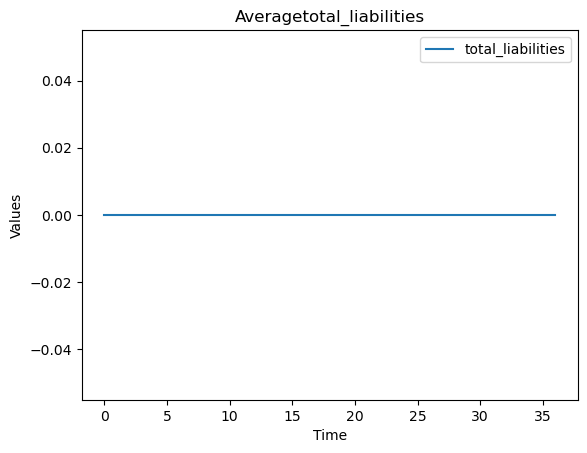

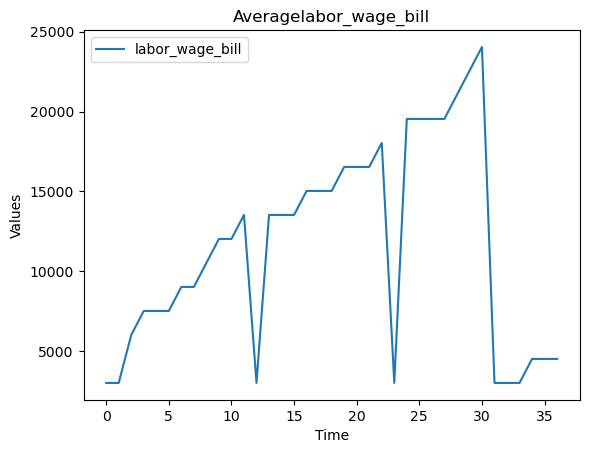

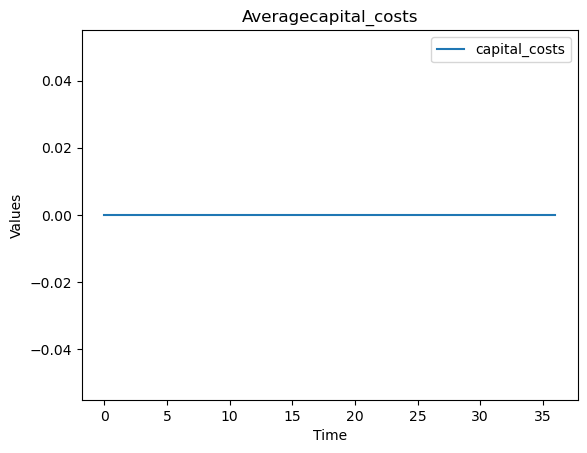

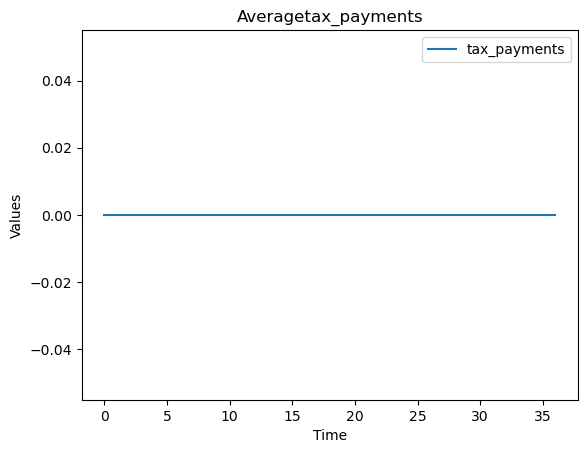

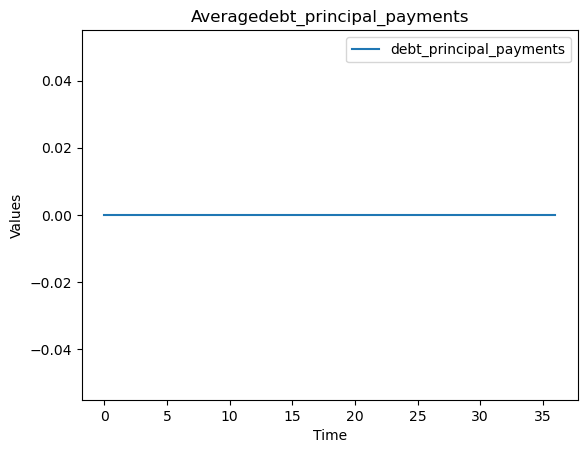

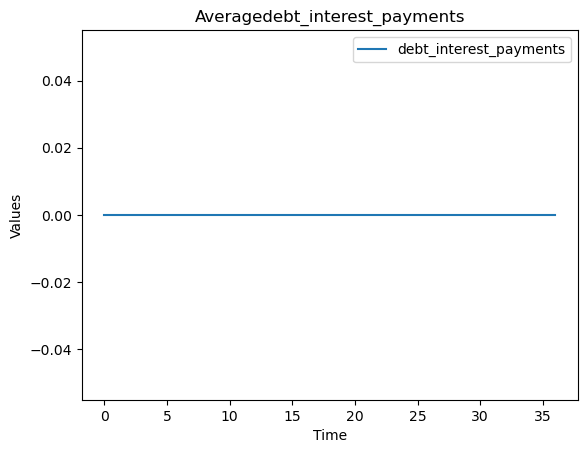

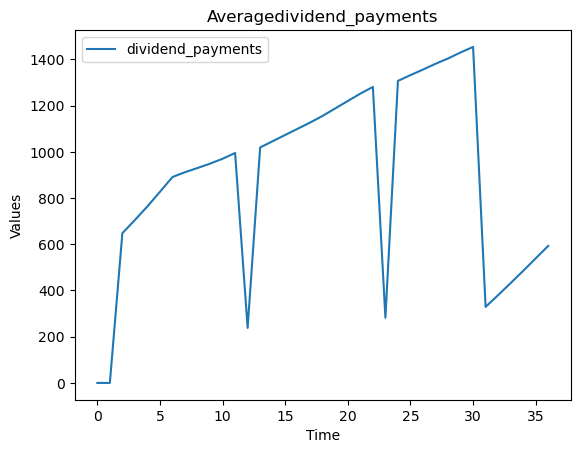

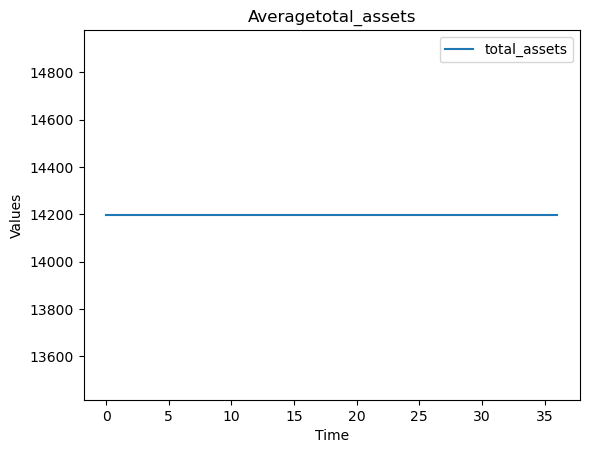

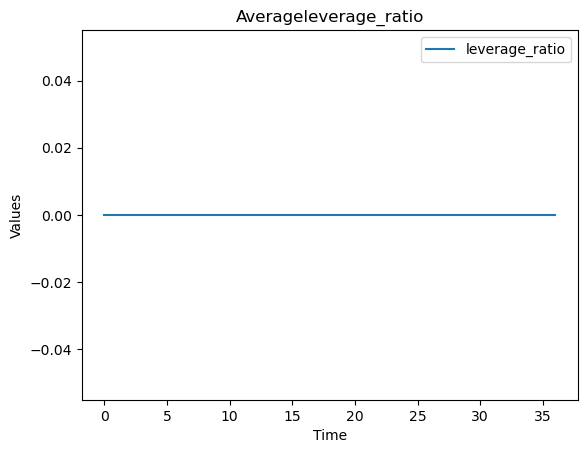

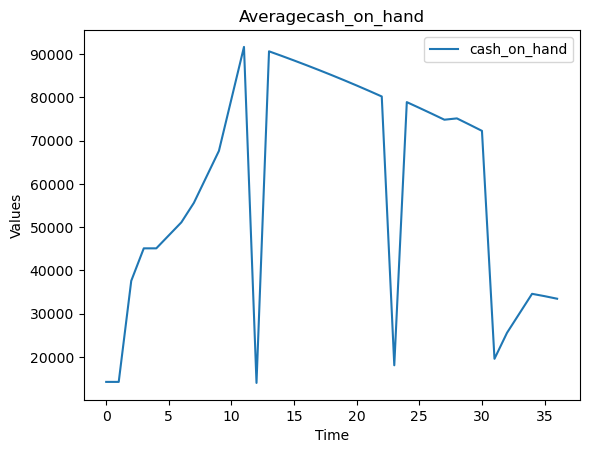

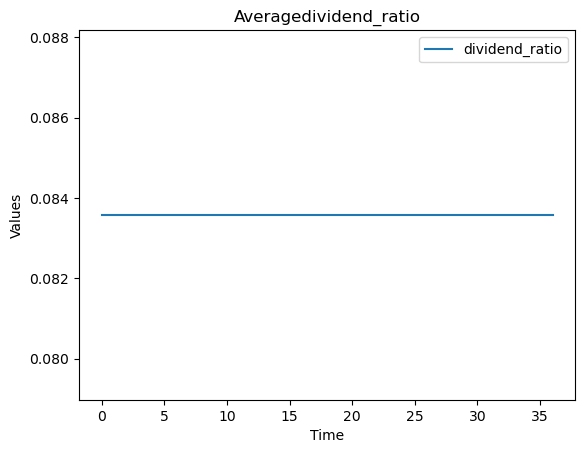

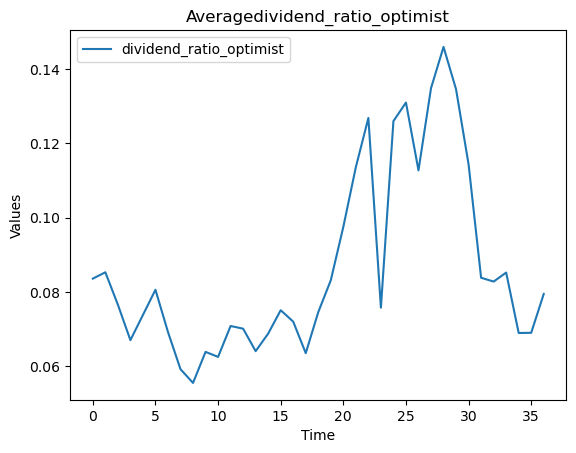

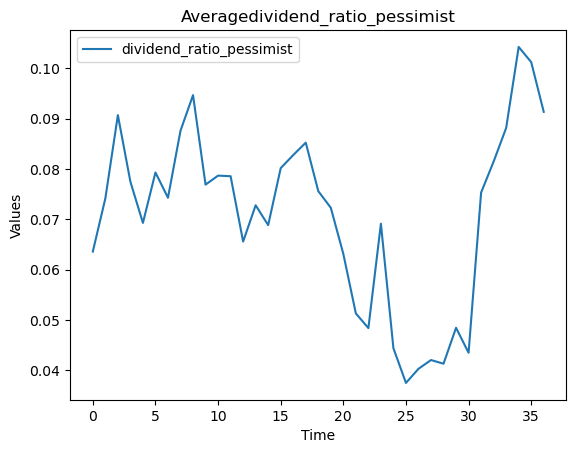

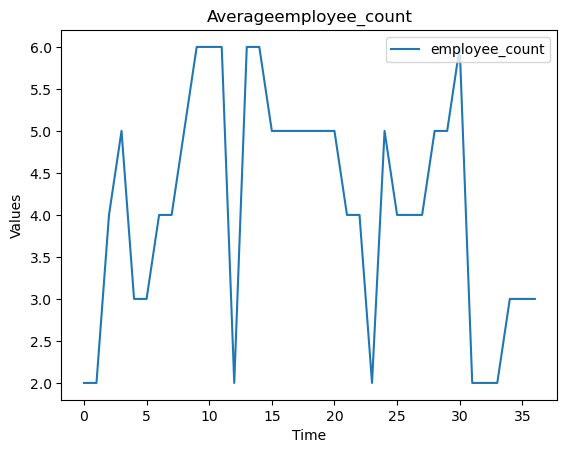

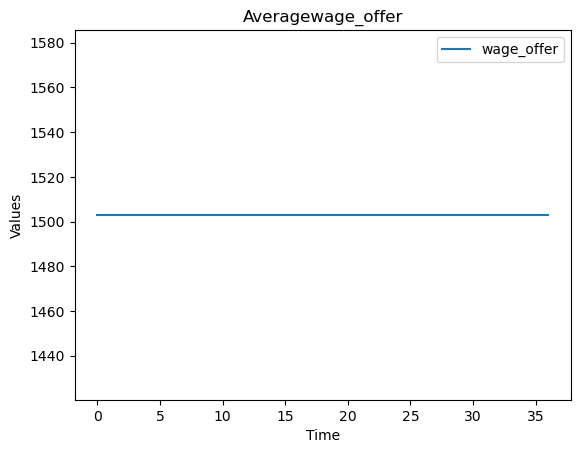

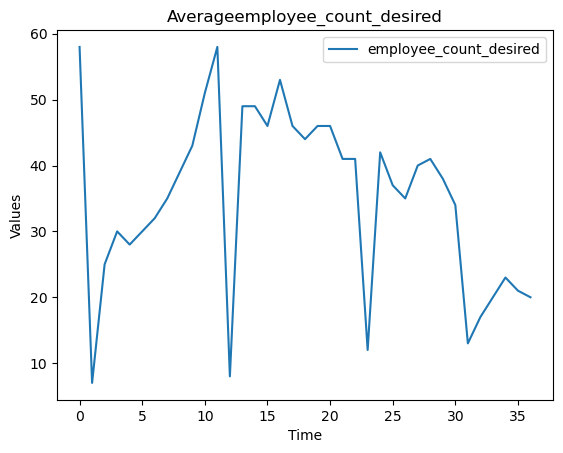

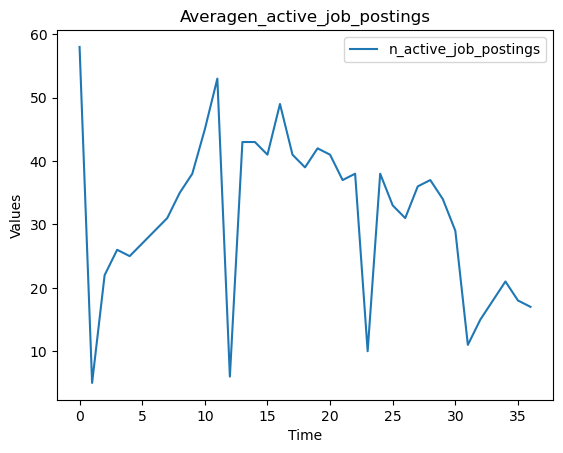

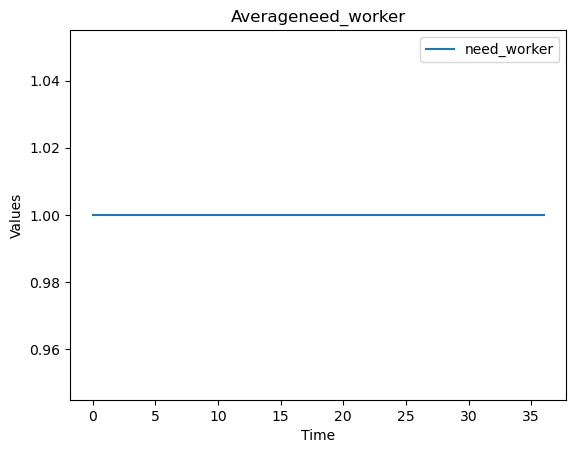

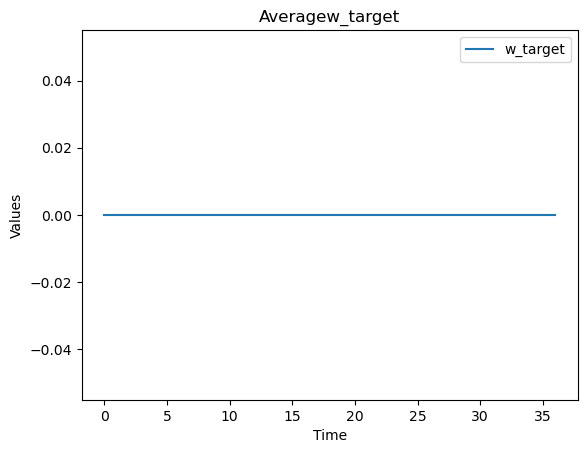

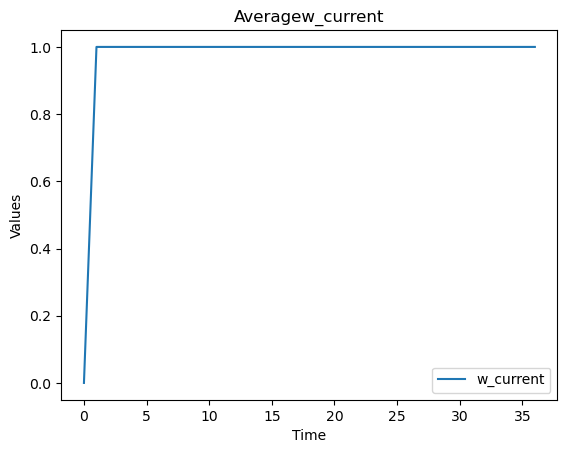

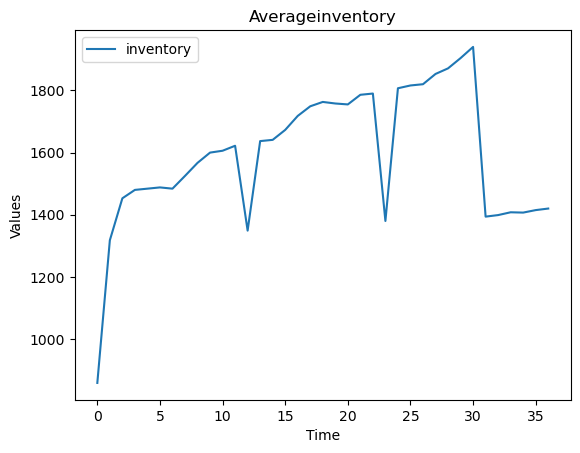

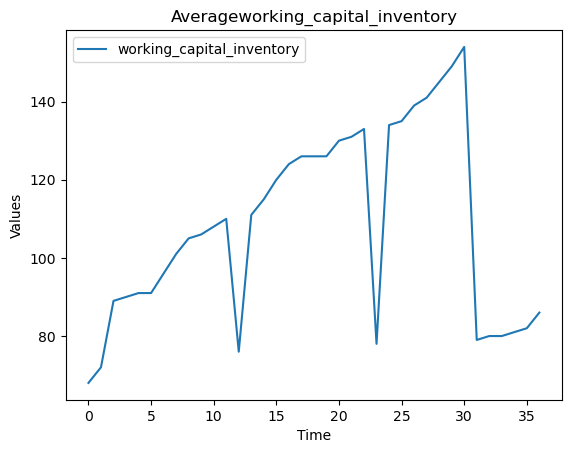

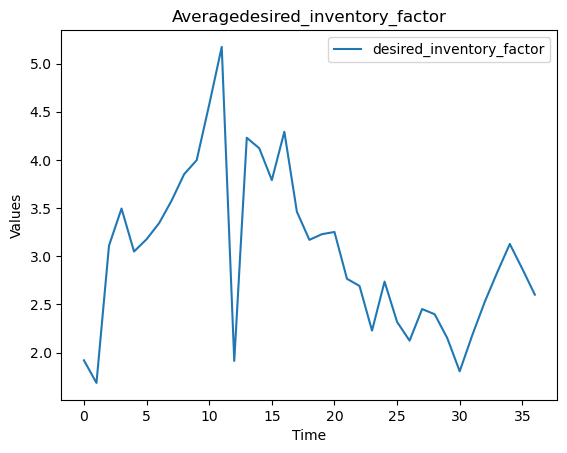

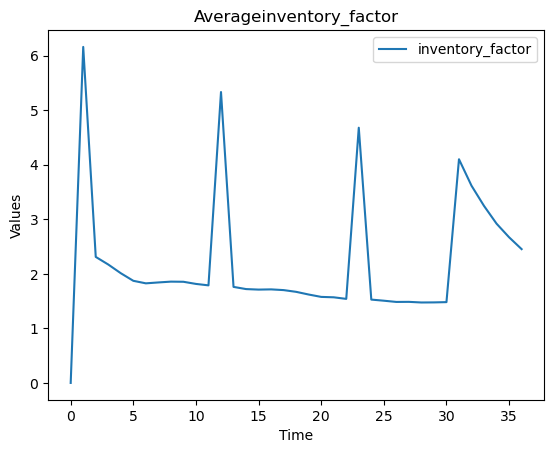

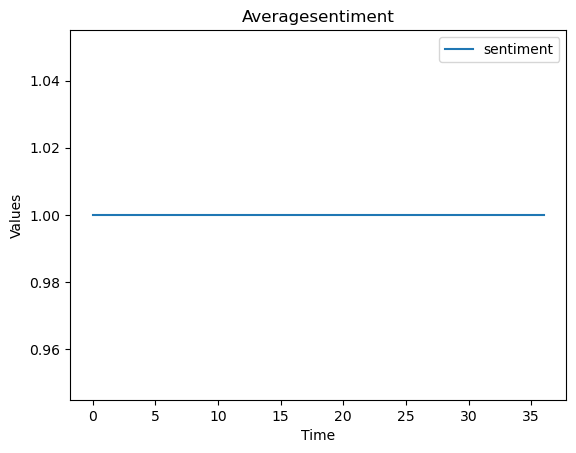

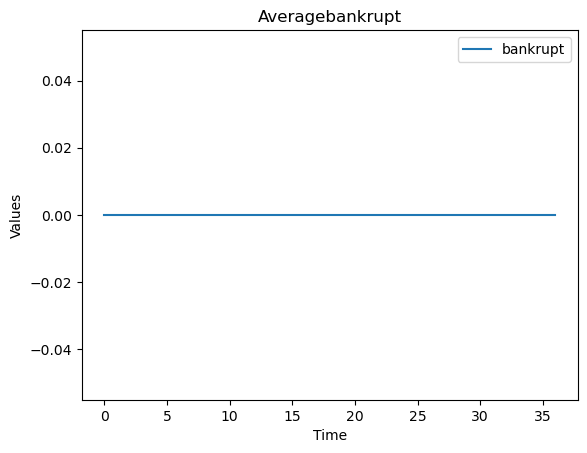

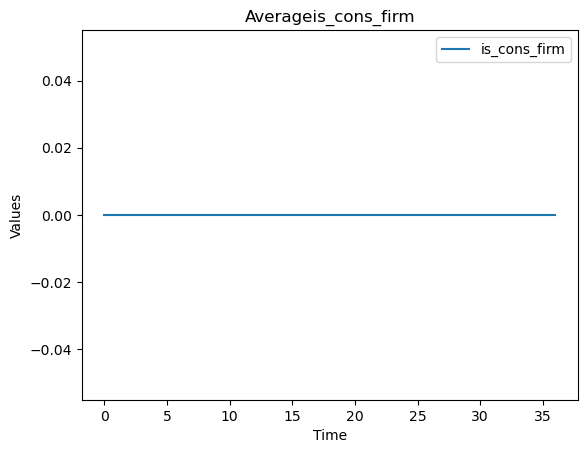

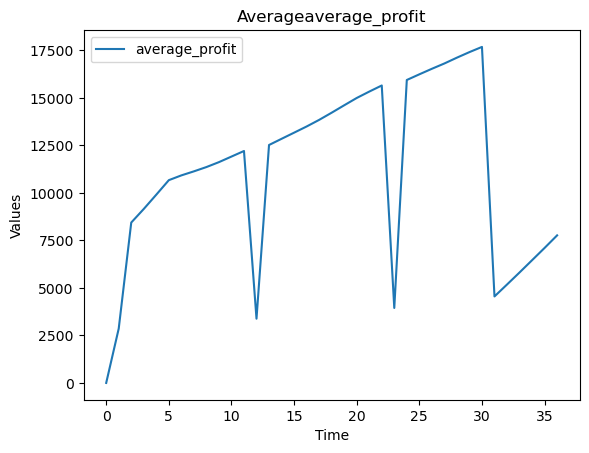

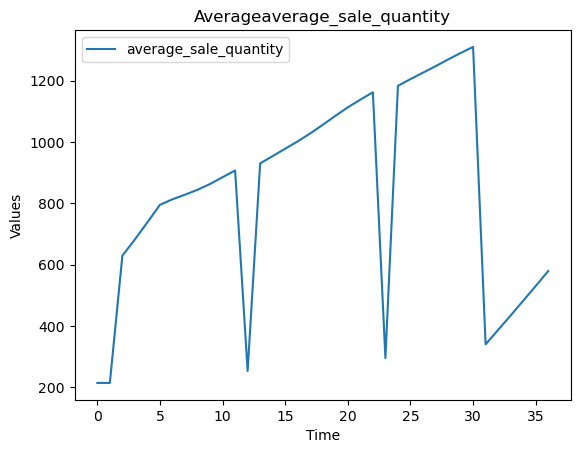

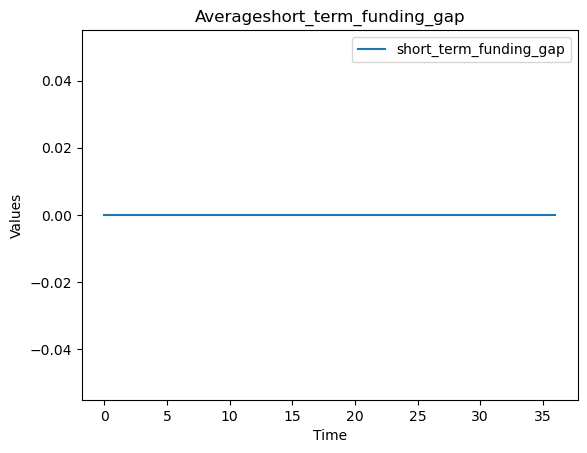

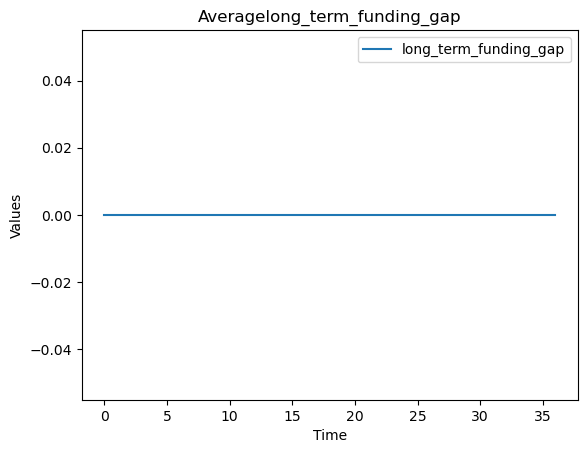

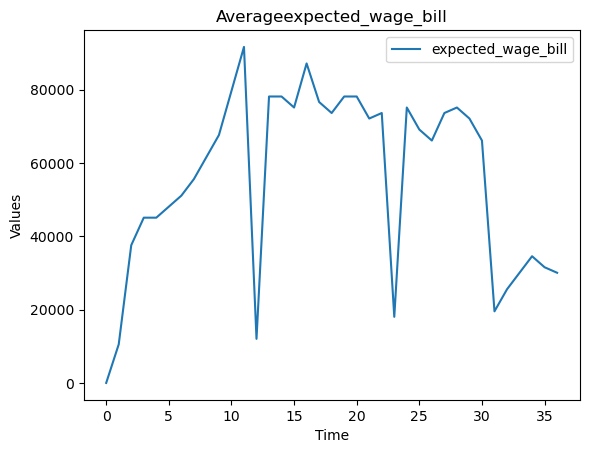

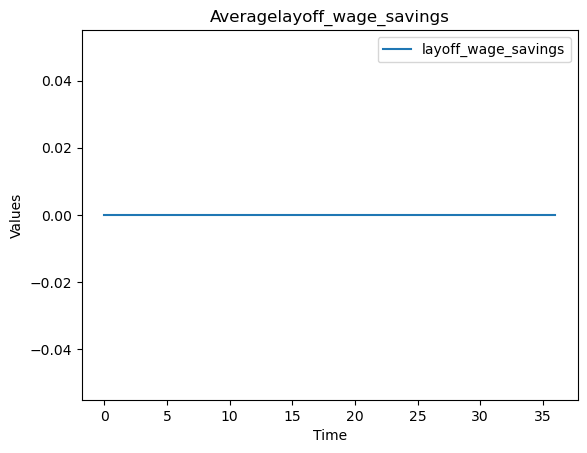

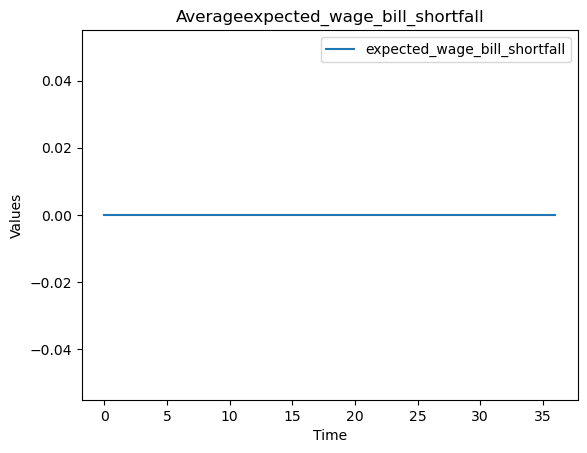

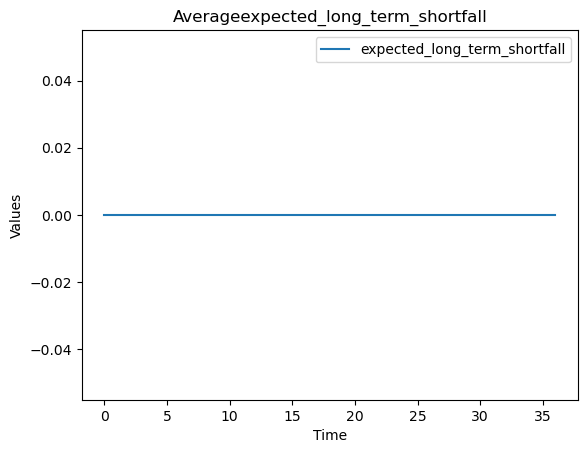

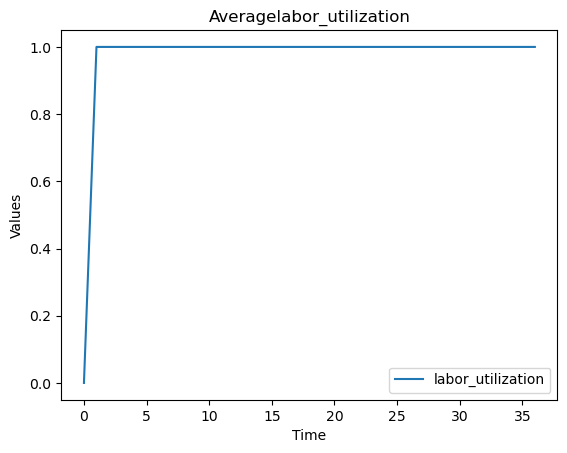

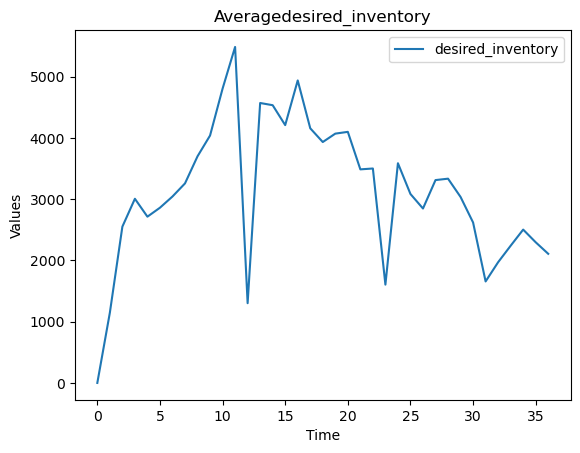

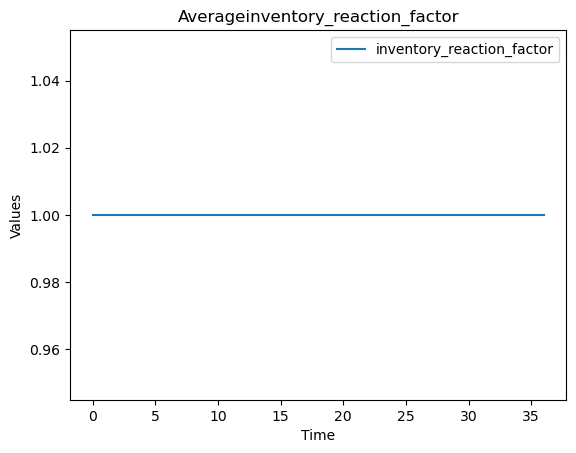

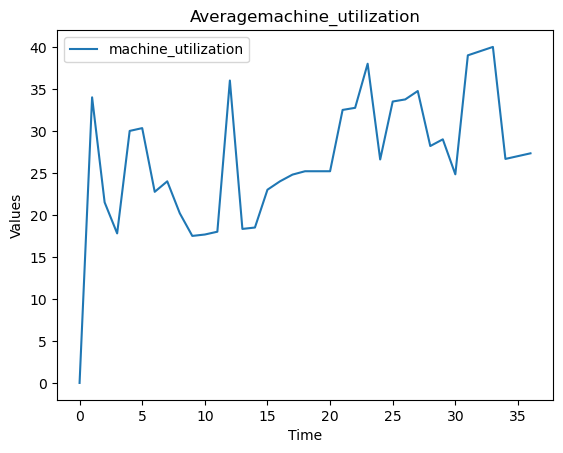

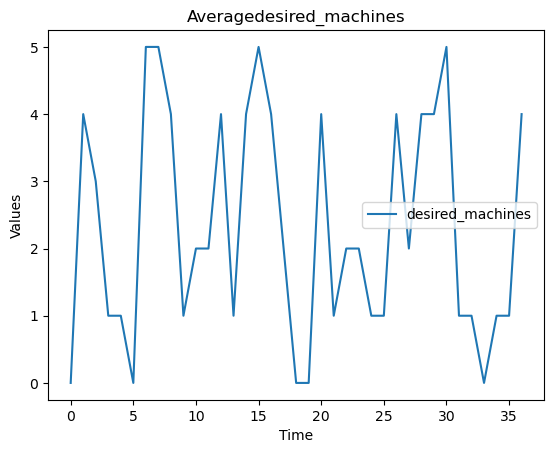

In [103]:
# averages for Capital firm
for column in average_cols:
    plt.plot(t, cap_firms_average[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f"Average{column}")
    plt.legend()
    plt.show()